# Latar Belakang

1.   Project ini adalah Final Project untuk Bootcamp Data Analytics yang diselenggarakan oleh Kementerian Komunikasi dan Informatika RI dan Kuncie Periode Bulan September - November 2023.
2.   Project ini menggunanakan bahasa Pemgrograman Python dan Visualisasi Data dengan menggunakan Looker Studio.
3.   Project ini akan dilakukan EDA, Data Preprocessing dan Permodelan Data Dengan Menggunakan beberapa model Algorithma yaitu : Logistic Regression, Random Forest Classifier, GaussianNB, Decision Tree Classifier.
4.  Project ini menggunakan Data sebanyak 1543 (seribu lima ratus empatpuluh tiga) baris dan 17 (tujuh belas) kolom.
5.  Tujuan Project ini akan memprediksi Apakah Pekerja disebuah Perusahaan memiliki Kemungkinan Besar Untuk Resign serta Kemungkinan Sedang untuk Resign dan membandingkan beberapa model Algorithma.



# Source Data dan Dataset Features

Source Data : https://www.kaggle.com/datasets/cocolicoq4/employee-churn-at-dunder-mifflin-paper-company

Dataset Features:

- **EmployeeID**: A unique identifier for each employee.
- **Tenure**: The number of years the employee has been with the company.
- **Salary**: The employee's annual salary.
- **Department**: The department in which the employee works (e.g., Sales, Accounting, Customer Service).
- **JobSatisfaction**: The employee's self-reported job satisfaction level - (on a scale from 1 to 5, with 5 being highly satisfied).
- **WorkLifeBalance**: The employee's self-reported work-life balance -  rating (on a scale from 1 to 5, with 5 being excellent).
- **CommuteDistance**: The distance the employee commutes to work (e.g., Short, Medium, Long).
- **MaritalStatus**: The marital status of the employee (e.g., Single, Married, Divorced).
- **Education**: The highest level of education attained by the employee (e.g., High School, Bachelor's, Master's).
- **PerformanceRating**: The employee's performance rating (on a scale from 1 to 5, with 5 being excellent).
- **TrainingHours**: The number of hours of training the employee has received.
- **OverTime**: Whether the employee works overtime or not.
- **NumProjects**: The number of projects the employee is currently working on.
- **YearsSincePromotion**: The number of years since the employee's last promotion.
- **EnvironmentSatisfaction**: The employee's self-reported environment satisfaction (on a scale from 1 to 5, with 5 being highly satisfied).
- **Branch**: The "Branch" feature represents the geographic location of each employee within one of the 12 Dunder Mifflin branches across the United States.
- **ChurnLikelihood (Target Variable)**:
Employees will be classified into three classes based on their likelihood to leave the company:

>- ChurnLikelihood 0: Highly likely to leave.
>- ChurnLikelihood 1: Moderately likely to leave.
>- ChurnLikelihood 2: Slightly likely to leave.




# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing
# from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import scipy.stats as stats

import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
# Load data dengan format data CSV

data = pd.read_csv('office_churn_dataset.csv')
data.head(5)

,EmployeeID,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


# Data Exploration

In [3]:
# ukuran baris dan kolom/Features dataset

print(f' Shape Data {(data.shape)} \n Total Baris : {(data.shape)[0]}\n Total Kolom : {(data.shape)[1]}')


 Shape Data (1543, 17) 
 Total Baris : 1543
 Total Kolom : 17


In [4]:
# nama setiap Features, jumlah data setiap Features, tipe data setiap Features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1543 non-null   int64  
 1   Branch                   1535 non-null   object 
 2   Tenure                   1534 non-null   float64
 3   Salary                   1534 non-null   float64
 4   Department               1543 non-null   object 
 5   JobSatisfaction          1515 non-null   float64
 6   WorkLifeBalance          1515 non-null   float64
 7   CommuteDistance          1543 non-null   object 
 8   MaritalStatus            1543 non-null   object 
 9   Education                1543 non-null   object 
 10  PerformanceRating        1536 non-null   float64
 11  TrainingHours            1352 non-null   float64
 12  OverTime                 1443 non-null   object 
 13  NumProjects              1444 non-null   float64
 14  YearsSincePromotion     

In [5]:
# statistic data

data.describe()

,EmployeeID,Tenure,Salary,JobSatisfaction,WorkLifeBalance,PerformanceRating,TrainingHours,NumProjects,YearsSincePromotion,EnvironmentSatisfaction
count,1543.000000,1534.000000,1534.000000,1515.000000,1515.000000,1536.000000,1352.000000,1444.000000,1542.000000,1515.000000
mean,772.000000,7.612125,66654.498044,3.421782,3.770770,3.493310,34.645646,3.500687,1.203632,2.521421
std,445.570047,4.123834,8473.622168,1.095047,0.481407,0.411208,22.970267,0.714107,2.059476,0.691325
min,1.000000,0.000000,40000.000000,1.000000,2.000000,1.639834,5.196002,1.505266,0.000000,1.000000
25%,386.500000,5.000000,61000.000000,3.000000,3.500000,3.333333,18.000000,3.000000,0.000000,2.000000
50%,772.000000,7.000000,66500.000000,3.000000,4.000000,3.363192,30.000000,3.618543,0.000000,2.780499
75%,1157.500000,10.000000,72375.000000,4.000000,4.000000,3.666667,40.000000,4.000000,2.000000,3.000000
max,1543.000000,27.000000,98000.000000,5.000000,5.000000,5.000000,96.000000,6.394718,16.000000,5.000000


nilai Standar Deviasi (std) masing-masing kolom dibawah nilai rata-rata (mean) mendandakan bahwa data tidak terlalu menyebar.

In [6]:
# Melihat Missing Value setiap Feature

print(f'Jumlah Missing Value masing-masing Feature : \n')
data.isnull().sum()

Jumlah Missing Value masing-masing Feature : 



EmployeeID                   0
Branch                       8
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
MaritalStatus                0
Education                    0
PerformanceRating            7
TrainingHours              191
OverTime                   100
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64

Terdapat Missing Value pada Feature
Branch,
Tenure,
Salary,
JobSatisfaction,
WorkLifeBalance,
PerformanceRating,
TrainingHours,
OverTime,
NumProjects,
YearsSincePromotion,
EnvironmentSatisfaction.         



In [7]:
# Melihat Duplicate data

print(f'Jumlah data Duplicated :  {(data.duplicated().sum())}')

Jumlah data Duplicated :  0


Tidak terdapat duplicate data

In [8]:
# melihat data unique setiap Feature

print(f'Jumlah data unique masing-masing Feature : \n')
data.nunique()

Jumlah data unique masing-masing Feature : 



EmployeeID                 1543
Branch                       12
Tenure                       26
Salary                       97
Department                   15
JobSatisfaction               5
WorkLifeBalance             124
CommuteDistance               3
MaritalStatus                 3
Education                     3
PerformanceRating           132
TrainingHours               126
OverTime                      1
NumProjects                 124
YearsSincePromotion          15
EnvironmentSatisfaction     124
ChurnLikelihood               3
dtype: int64

In [9]:
# Melihat nama Feature

print(f'nama masing-masing Feature : \n')
data.columns

nama masing-masing Feature : 



Index(['EmployeeID', 'Branch', 'Tenure', 'Salary', 'Department',
       'JobSatisfaction', 'WorkLifeBalance', 'CommuteDistance',
       'MaritalStatus', 'Education', 'PerformanceRating', 'TrainingHours',
       'OverTime', 'NumProjects', 'YearsSincePromotion',
       'EnvironmentSatisfaction', 'ChurnLikelihood'],
      dtype='object')

## Barchart dan Boxplot dan Distribusi Data

### Data Kategorik

In [10]:
# menghitung jumlah dan persen kelas pada Feature 'ChurnLikelihood' (Target)

jumlah = data['ChurnLikelihood'].value_counts()
persen = round((jumlah/len(data['ChurnLikelihood'])*100), 2)
pd.concat([jumlah,persen],axis=1,keys=['Total','%'])

,Total,%
Highly Likely to Churn,884,57.29
Moderately Likely to Churn,627,40.64
Slightly Likely to Churn,32,2.07


Dikarenakan terdapat imbalance data pada kolom 'ChurnLikelihood' (Target) yaitu kelas 'Slighly Likely to Churn' sebanyak 2,07% maka data tersebut nantinya akan dipindahkan pada kelas 'Moderately Likely to Churn'.

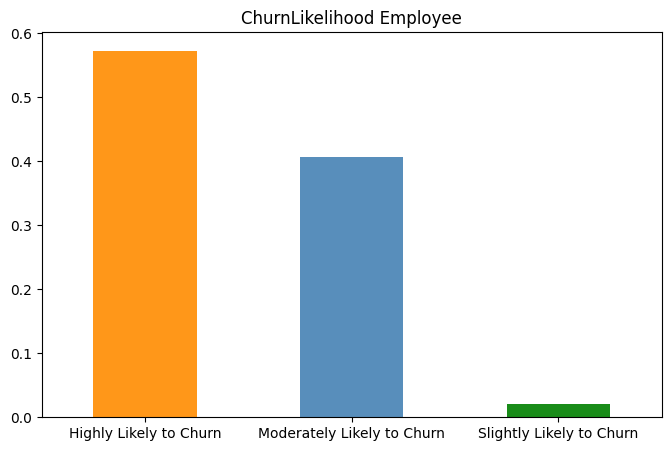

In [11]:
#visualisasi barchart data feature 'ChurnLikelihood'

fig = plt.figure(figsize = (8,5))
data['ChurnLikelihood'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue', 'green'], alpha = 0.9, rot=0)
plt.title('ChurnLikelihood Employee')
plt.show()

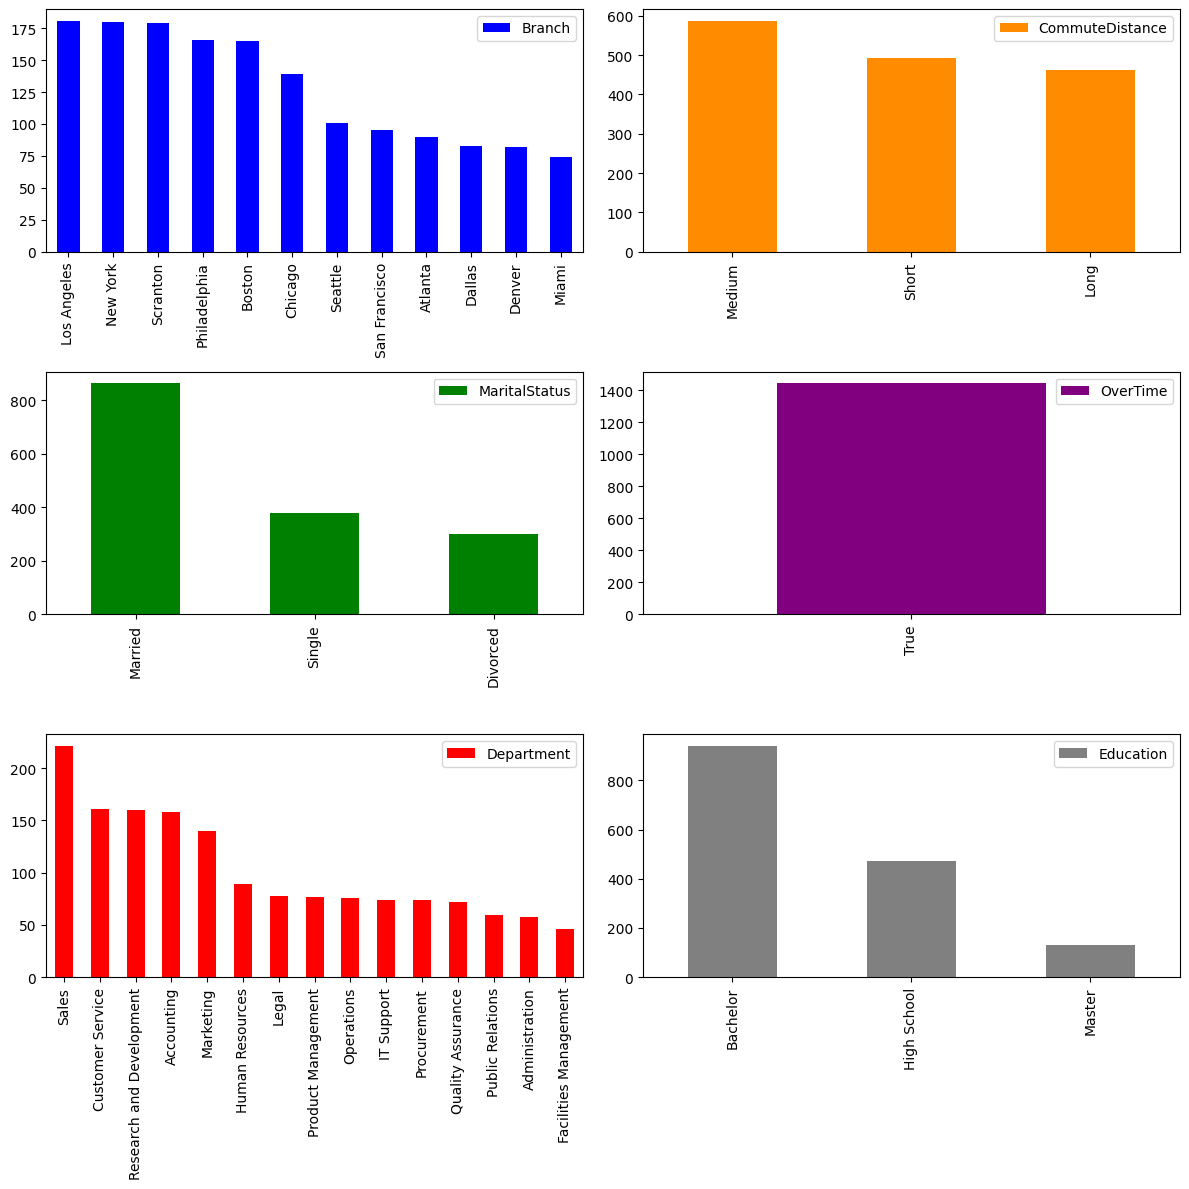

In [12]:
#visualisasi barchart data kaetgorik

fig, axs = plt.subplots(nrows =3, ncols=2, figsize=(12, 12))
data['Branch'].value_counts().to_frame().plot(kind='bar', ax=axs[0,0], color= ['blue'])
data['CommuteDistance'].value_counts().to_frame().plot(kind='bar', ax=axs[0,1], color= ['darkorange'])
data['MaritalStatus'].value_counts().to_frame().plot(kind='bar', ax=axs[1,0], color= ['green'])
data['OverTime'].value_counts().to_frame().plot(kind='bar', ax=axs[1,1], color= ['purple'])
data['Department'].value_counts().to_frame().plot(kind='bar', ax=axs[2,0], color= ['red'])
data['Education'].value_counts().to_frame().plot(kind='bar', ax=axs[2,1], color= ['grey'])


fig.tight_layout()

### Data Numeric

In [13]:
#variabel untuk kolom numerik

col_numeric = ['Tenure', 'Salary', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'TrainingHours',
                'NumProjects', 'YearsSincePromotion', 'EnvironmentSatisfaction']

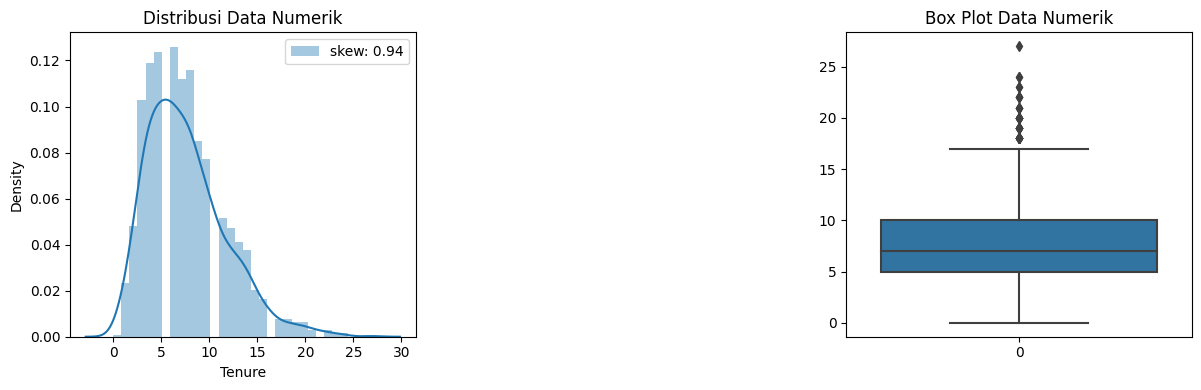

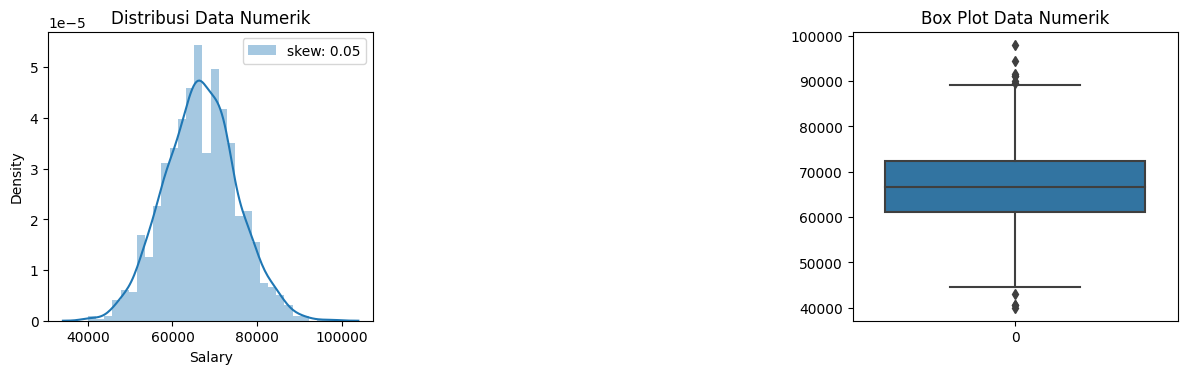

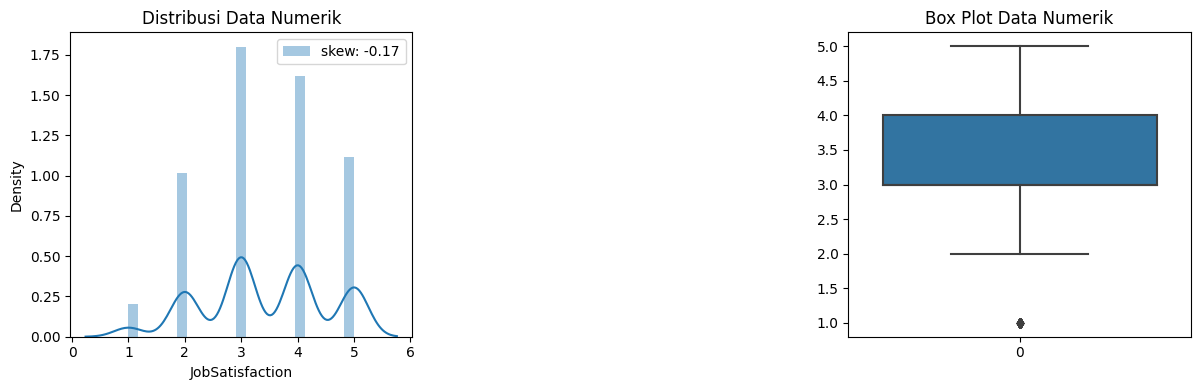

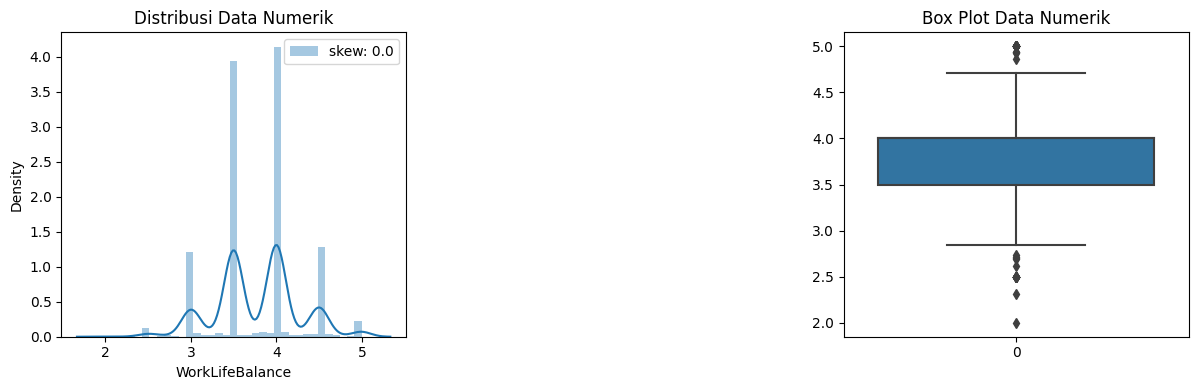

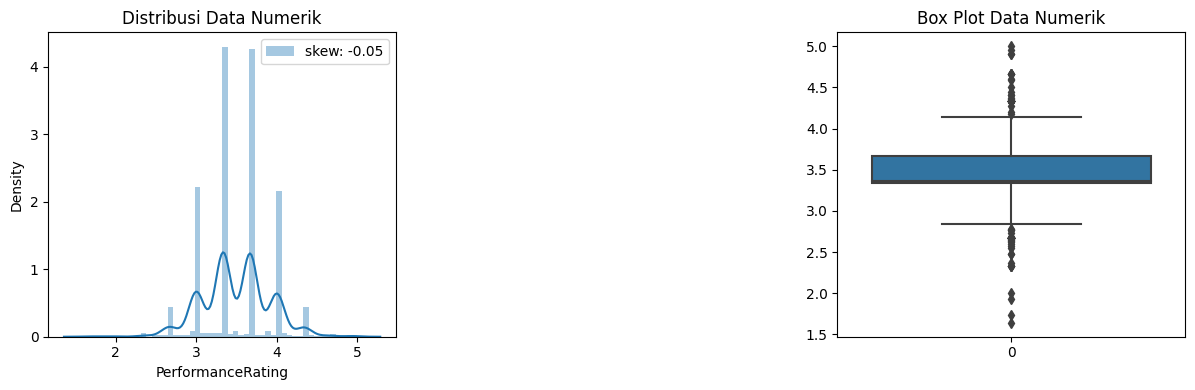

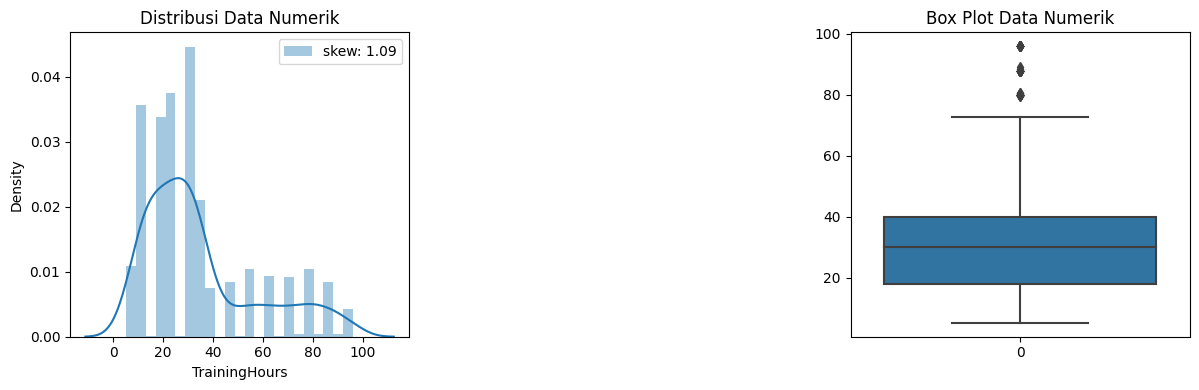

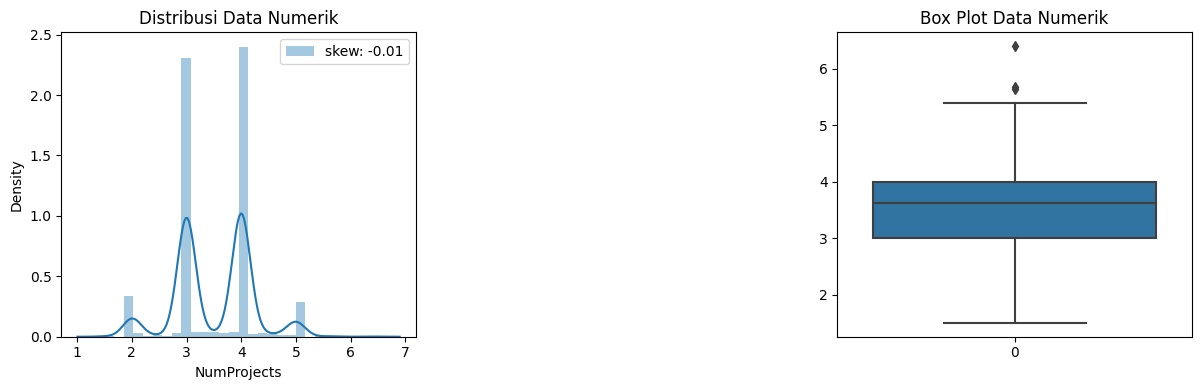

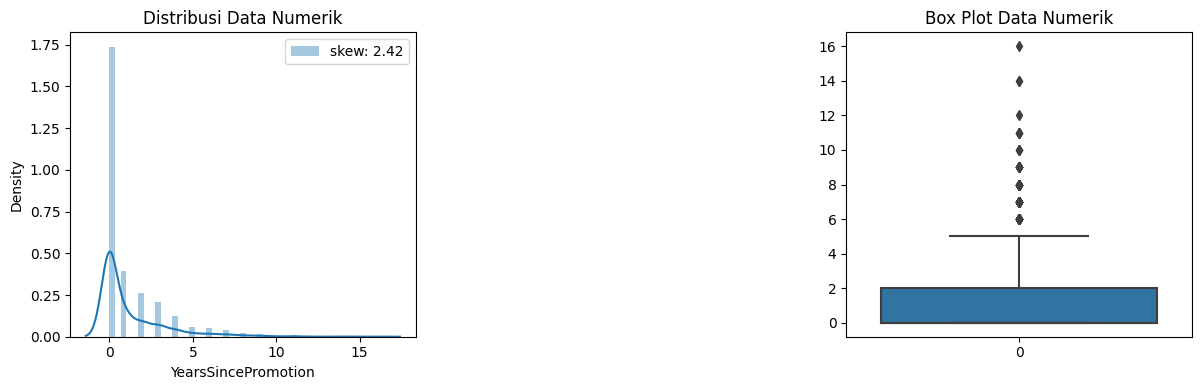

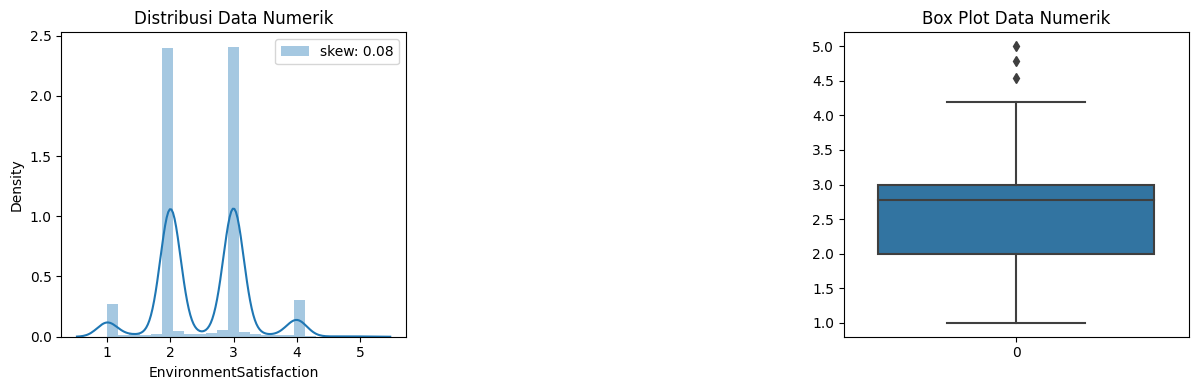

In [14]:
#visualisasi distribusi data dan boxplot untuk data numerik

for col in col_numeric:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.title('Distribusi Data Numerik')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title('Box Plot Data Numerik')

    plt.tight_layout()
    plt.show()

**Kesimpulan dari data asli :**

Untuk data Kategorik :
- Data Churnlikelihood (Target) terbanyak adalah kelas Highly Likely to Churn sebanyak 884 data atau 57.29%.
- Employee terbanyak berada di daerah Los Angeles.
- CommuteDistance atau jarak antara tempat tinggal dan tempat kerja, terbanyak adalah Medium.
- Status Employee terbanyak adalah Married.
- Employee seluruhnya bekerja Overtime.
- Department terbanyak Sales.
- Pendidikan Employee terbanyak yaitu Bachelor.

Untuk Data Numerik :
- Pada Boxplot terdapat data oulier untuk keseluruhan data numerik yaitu pada Feature 'Tenure', 'Salary', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'TrainingHours', 'NumProjects', 'YearsSincePromotion', 'EnvironmentSatisfaction'.
- Distribusi data numerik menunjukkan terdapat skewness.


# Data Preprocessing

## Data Copy

In [15]:
#mengcopy data agar data asli tidak berubah

data_copy = data.copy()

In [16]:
# drop Feature 'EmployeeID' karena tidak digunakan

data_copy = data_copy.drop(['EmployeeID'], axis = 1)

## Cek Ukuran Data Target

In [17]:
#melihat jumlah dan persen kelas pada feature 'ChurnLikelihood' (Target)

jumlah = data_copy['ChurnLikelihood'].value_counts()
persen = round((jumlah/len(data_copy['ChurnLikelihood'])*100), 2)
pd.concat([jumlah,persen],axis=1,keys=['Total','%'])

,Total,%
Highly Likely to Churn,884,57.29
Moderately Likely to Churn,627,40.64
Slightly Likely to Churn,32,2.07


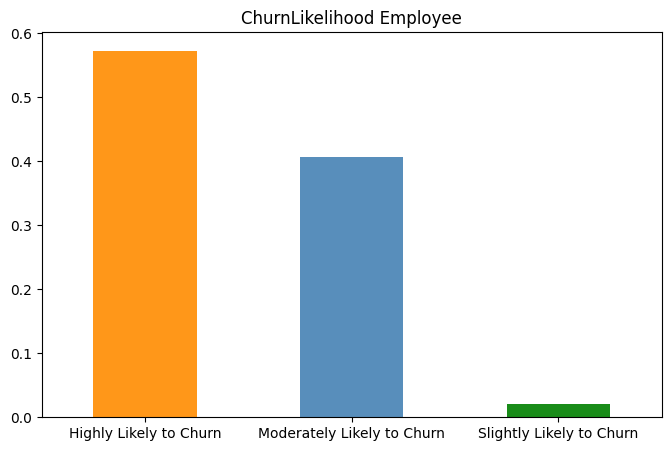

In [18]:
#visualisasi barchart pada kelas feature 'ChurnLikelihood' (Target)

fig = plt.figure(figsize = (8,5))
data_copy['ChurnLikelihood'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue', 'green'], alpha = 0.9, rot=0)
plt.title('ChurnLikelihood Employee')
plt.show()

Dikarenakan terdapat imbalance data, maka untuk kelas 'Slightly Likely to Churn' akan dipindahkan ke kelas 'Moderately Likely to Churn'.

In [19]:
# mengganti data kelas 'Slightly Likely to Churn' ke 'Moderately Likely to Churn'

data_copy['ChurnLikelihood'] = data_copy['ChurnLikelihood'].replace('Slightly Likely to Churn', 'Moderately Likely to Churn')

In [20]:
# melihat persen setiap kelas pada Feature 'ChurnLikelihood' (Target) setelah dipindahkan

jumlah2 = data_copy['ChurnLikelihood'].value_counts()
persen2 = round((jumlah2/len(data['ChurnLikelihood'])*100), 2)
pd.concat([jumlah2,persen2],axis=1,keys=['Total','%'])

,Total,%
Highly Likely to Churn,884,57.29
Moderately Likely to Churn,659,42.71


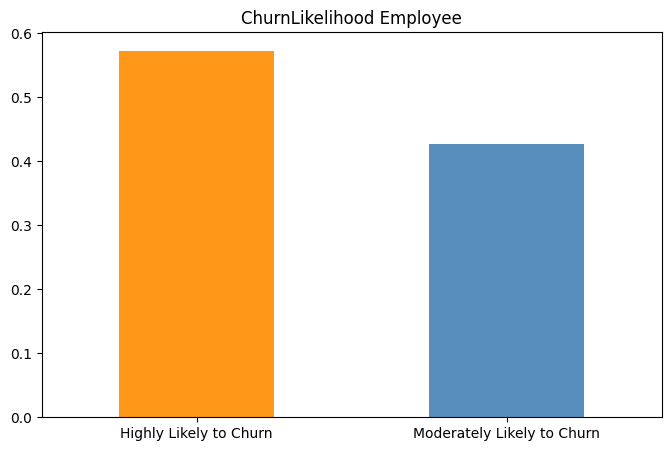

In [21]:
fig2 = plt.figure(figsize = (8,5))
data_copy['ChurnLikelihood'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('ChurnLikelihood Employee')
plt.show()

Maka Feature 'Churnlikelihood' (Target) hanya tersisa kelas 'Highly Likely to Churn' dan 'Moderately Likely to Churn'.

## Merubah Data Ordinal

In [22]:
# merubah data scale menjadi round data

data_copy['WorkLifeBalance'] = data_copy['WorkLifeBalance'].round()
data_copy['PerformanceRating'] = data_copy['PerformanceRating'].round()
data_copy['EnvironmentSatisfaction'] = data_copy['EnvironmentSatisfaction'].round()
data_copy['NumProjects'] = data_copy['NumProjects'].round()

pada Feature 'WorkLifeBalance', 'PerformanceRating', 'EnvironmentSatisfaction', 'NumProjects' merupakan Scale data, maka diputuskan untuk membulatkan data dengan round.


## Bar Chart

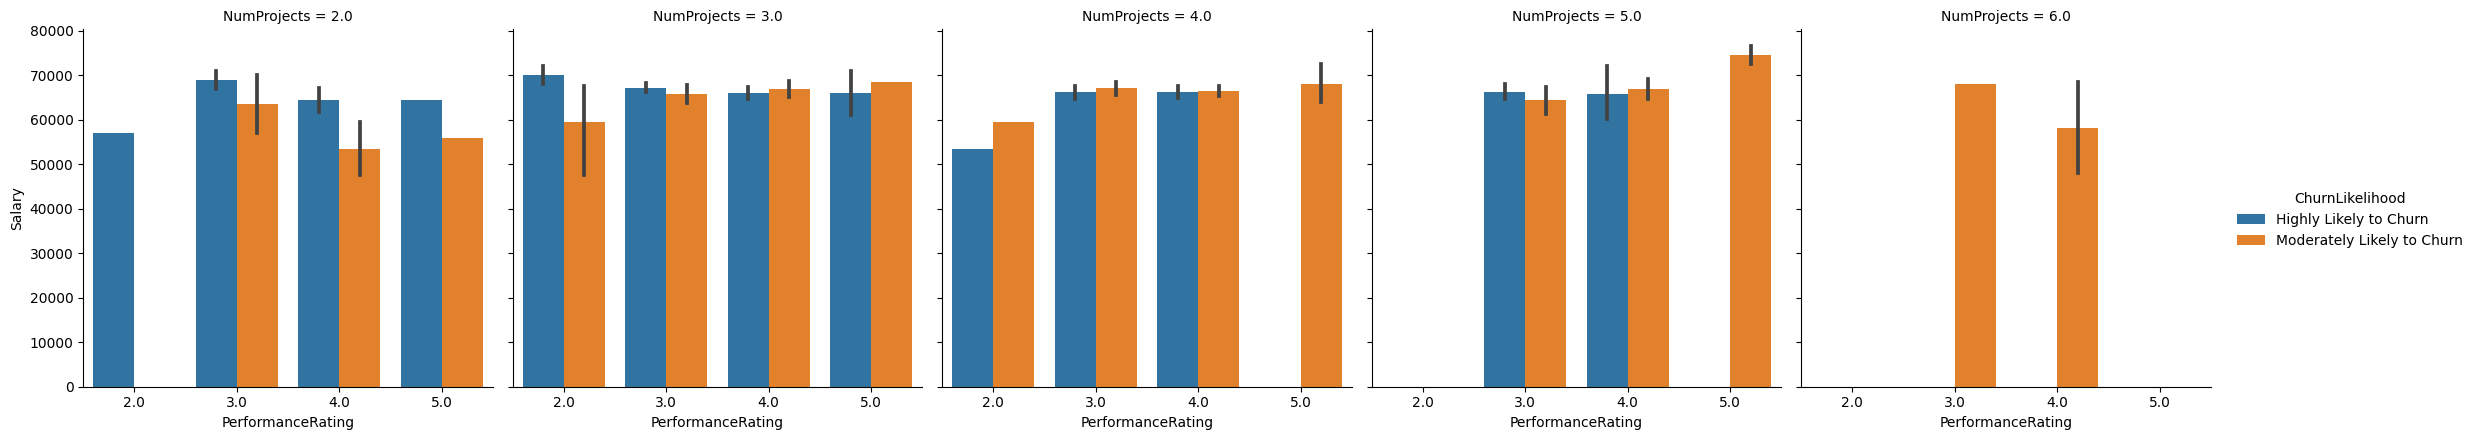

In [23]:
# visualisasi barchart fetaure "PerformanceRating" vs "Salary" vs "ChurnLikelihood" vs "NumProjects"

sns.catplot(x="PerformanceRating", y="Salary", hue="ChurnLikelihood", col="NumProjects", data=data_copy, kind="bar", height=4.5, aspect=1.0)

fetaure "PerformanceRating" vs "Salary" vs "ChurnLikelihood" vs "NumProjects" menunjukkan kategori employee memiliki banyak proyek, Performance rating employee dapat dikatakan cukup tinggi dan memiliki Salary tinggi, kemungkinan resign/churn sedang.

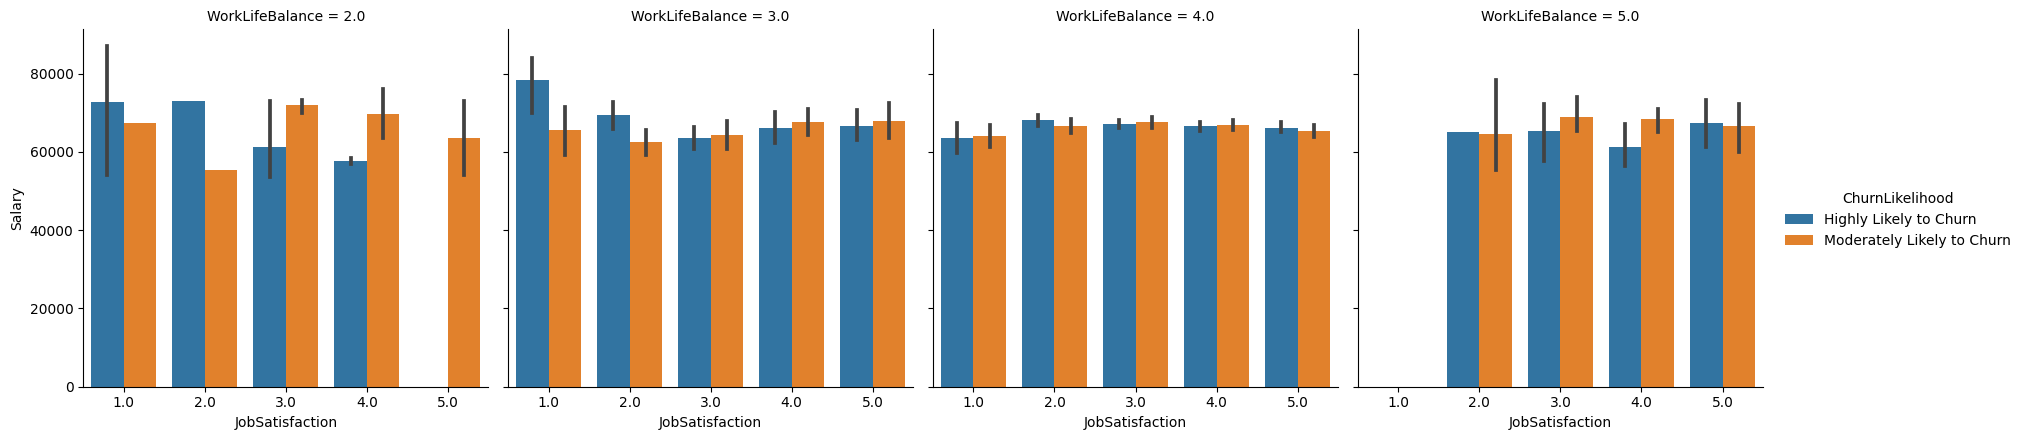

In [24]:
# visualisasi barchart fetaure "JobSatisfaction" vs "Salary" vs "ChurnLikelihood" vs "WorklifeBalance"

sns.catplot(x="JobSatisfaction", y="Salary", hue="ChurnLikelihood", col="WorkLifeBalance", data=data_copy, kind="bar", height=4.5, aspect=1.0)

fetaure "JobSatisfaction" vs "Salary" vs "ChurnLikelihood" vs "WorklifeBalance" menunjukan kategori employee yang merasa "WorklifeBalance" tinggi dan "JobSatisfaction" tinggi, memiliki "Salary" rata-rata, kemungkinan besar akan resign/churn atau kemungkinan sedang akan resign/churn kurang lebih sama.

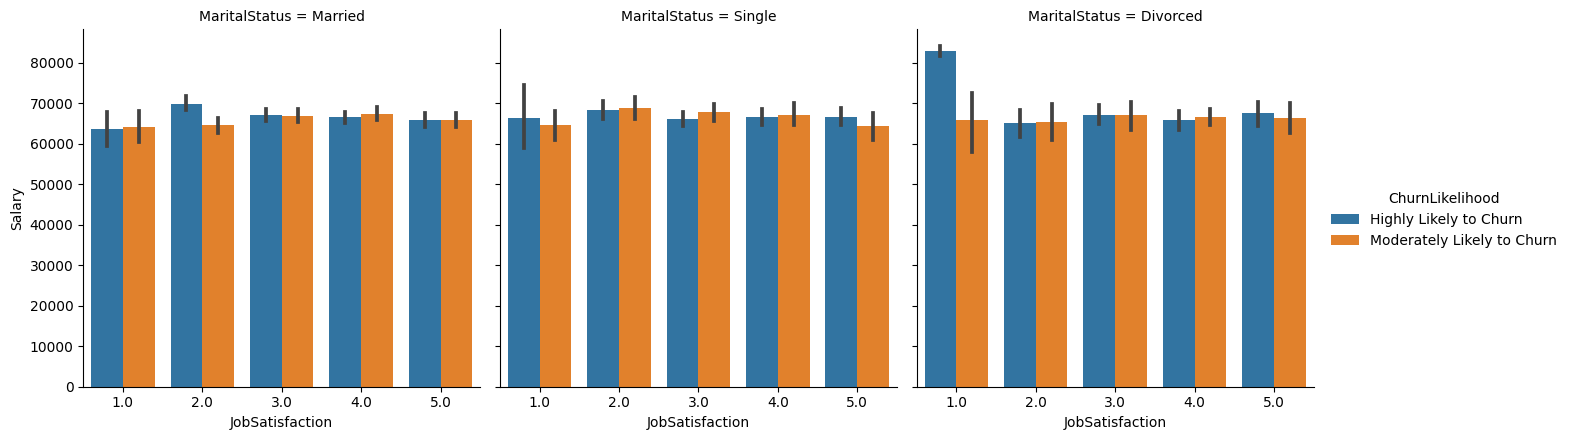

In [25]:
# visualisasi barchart fetaure "JobSatisfaction" vs "Salary" vs "ChurnLikelihood" vs "Martial Satus"

sns.catplot(x="JobSatisfaction", y="Salary", hue="ChurnLikelihood", col="MaritalStatus", data=data_copy, kind="bar", height=4.5, aspect=1.0)

fetaure "JobSatisfaction" vs "Salary" vs "ChurnLikelihood" vs "MartialSatus" menunjukkan kategori employee dengan Marital status Divorce, Salary tinggi, merasa puas dengan pekerjaannya namun memiliki kemungkinan besar resign/churn .

<Axes: ylabel='Department'>

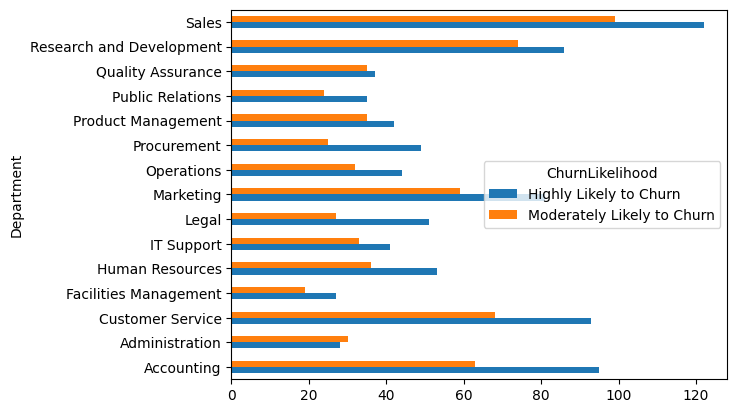

In [26]:
# visualisasi barchart "Department" vs "Chunrlikelihood"

data_copy.groupby('Department').ChurnLikelihood.value_counts().unstack().plot.barh()

Departemen Sales memiliki kelas kemungkinan resign/churn tertinggi.

<Axes: ylabel='Education'>

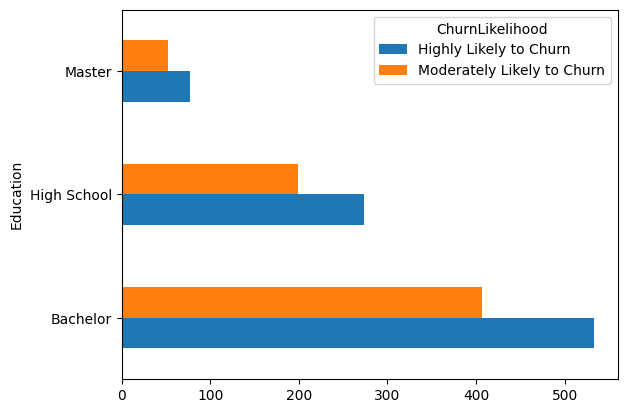

In [27]:
# Visualisasi barchart "Education" vs "Churnlikelihood"

data_copy.groupby('Education').ChurnLikelihood.value_counts().unstack().plot.barh()

tertinggi Employee dengan kaegori Eduaction Bachelor memiliki kemungkinan tertinffi untuk resign/churn.

<Axes: ylabel='Tenure'>

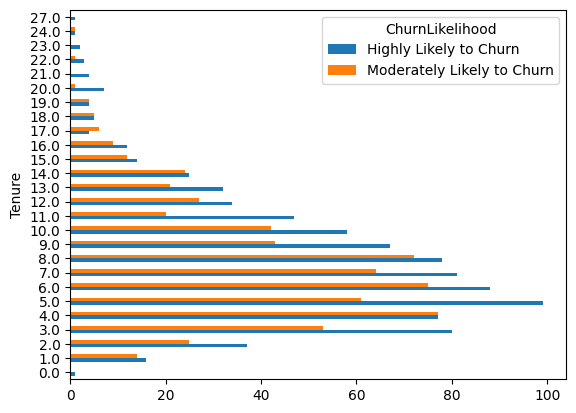

In [28]:
# visualisasi barchart Tebure/lama bekerja vs Churnlikelihood

data_copy.groupby('Tenure').ChurnLikelihood.value_counts().unstack().plot.barh()

employee dengan masa kerja 5 tahun paling banyak memiliki kemungkinan untuk resign/churn.

<Axes: ylabel='YearsSincePromotion'>

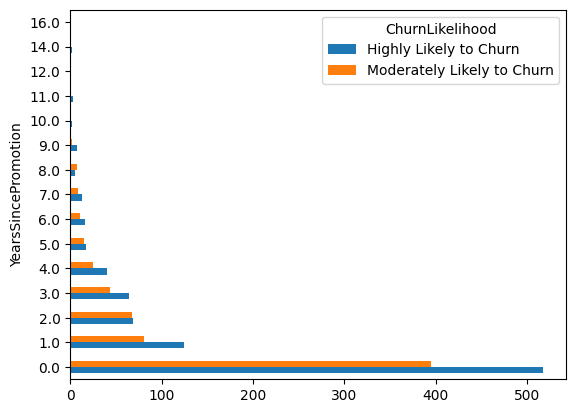

In [29]:
# visualisasi barchart 'YearsSincePromotion' vs 'ChurnLikelihood'

data_copy.groupby('YearsSincePromotion').ChurnLikelihood.value_counts().unstack().plot.barh()

employee baru  memiliki kemungkinan resgin/churn tinggi.

## Line Chart

Text(0.5, 1.0, 'Gaji Berdasarkan Lama Bekerja')

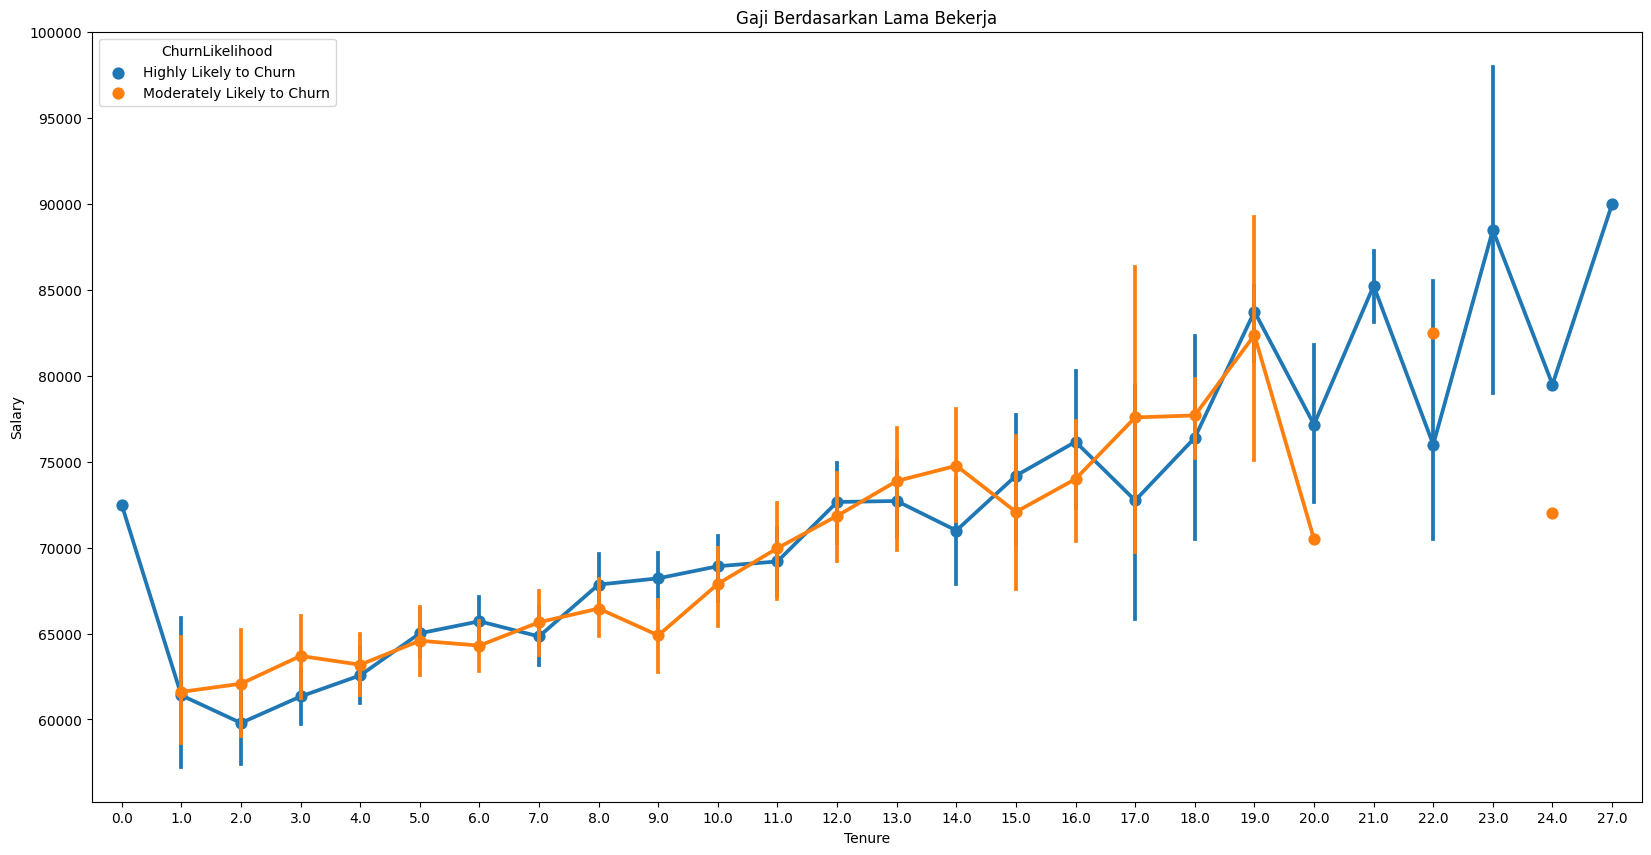

In [30]:
plt.figure(figsize=(20,10))
sns.pointplot(x = data_copy['Tenure'],y = data_copy['Salary'], hue=data_copy['ChurnLikelihood'])
plt.title("Gaji Berdasarkan Lama Bekerja")

Semakin lama bekerja maka Gaji semakin tinggi

## Missing Value

In [31]:
# Melihat Missing Value masing-masing features

sum_missing = data_copy.isnull().sum()
sum_missing

Branch                       8
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
MaritalStatus                0
Education                    0
PerformanceRating            7
TrainingHours              191
OverTime                   100
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64

In [32]:
# Melihat persen Missing Value masing-masing features

persen_missing = round((data_copy.isnull().sum()/len(data_copy))* 100, 2)
persen_missing

Branch                      0.52
Tenure                      0.58
Salary                      0.58
Department                  0.00
JobSatisfaction             1.81
WorkLifeBalance             1.81
CommuteDistance             0.00
MaritalStatus               0.00
Education                   0.00
PerformanceRating           0.45
TrainingHours              12.38
OverTime                    6.48
NumProjects                 6.42
YearsSincePromotion         0.06
EnvironmentSatisfaction     1.81
ChurnLikelihood             0.00
dtype: float64

In [33]:
# Melihat dataframe jumlah dan persentase Missing Value masing-masing fetaures

df_missing = pd.concat([sum_missing,persen_missing], axis = 1, keys=['Missing','% Missing'])
df_missing

,Missing,% Missing
Branch,8,0.52
Tenure,9,0.58
Salary,9,0.58
Department,0,0.00
JobSatisfaction,28,1.81
WorkLifeBalance,28,1.81
CommuteDistance,0,0.00
MaritalStatus,0,0.00
Education,0,0.00
PerformanceRating,7,0.45


11 dari 17 feature dalam dataset memiliki Missing Value dan yang tertinggi pada fetaure 'TrainingHours'.

### Missing Value Data Kategorik

In [34]:
# mengisi missing value feature 'Branch'

data_copy['Branch'] = data_copy['Branch'].fillna('Unknown')

Pada fetuare 'Brach' saya memutuskan untuk mengisi missing value dengan 'Unknown' dikarenakan Branch/kota memiliki kategori yang luas.

In [35]:
# mengisi missing value feature 'OverTime'

data_copy['OverTime'] = data_copy['OverTime'].fillna(data_copy['OverTime'].mode()[0])

In [36]:
# merubah tipe data boolean pada feature 'OverTime' menajadi 1 atau secara otomatis berubah menjadi integer

data_copy['OverTime'] = data_copy['OverTime'].replace(True, 1)

### Missing Value Data Numeric

In [37]:
# Melihat feature data numeric

data_copy.select_dtypes(exclude=['object']).columns

Index(['Tenure', 'Salary', 'JobSatisfaction', 'WorkLifeBalance',
       'PerformanceRating', 'TrainingHours', 'OverTime', 'NumProjects',
       'YearsSincePromotion', 'EnvironmentSatisfaction'],
      dtype='object')

In [38]:
#Melihat rata-rata feature 'Tenure'

mean_Tenure = data_copy['Tenure'].mean()
mean_Tenure

7.612125162972621

In [39]:
# mengisi missing value pada feature 'Tenure' dengan mean

data_copy['Tenure'] = data_copy['Tenure'].fillna(mean_Tenure)

In [40]:
# Melihat mean feature 'Salary'

mean_Salary = data_copy['Salary'].mean()
mean_Salary

66654.49804432855

In [41]:
# Mengisi Missing value feature 'Salary' dengan mean

data_copy['Salary'] = data_copy['Salary'].fillna(mean_Salary)

In [42]:
# Melihat kategori data paling banyak pada feature 'JobSatisfation'

data_copy['JobSatisfaction'].value_counts()

3.0    474
4.0    426
5.0    294
2.0    267
1.0     54
Name: JobSatisfaction, dtype: int64

In [43]:
# Mengisi missing value pada feature 'JobSatisfaction' dengan mode/kategori paling banyak muncul

data_copy['JobSatisfaction'] = data_copy['JobSatisfaction'].fillna(data_copy['JobSatisfaction'].mode()[0])

In [44]:
# Melihat kategori data paling banyak pada feature 'WorkLifeBalance'

data_copy['WorkLifeBalance'].value_counts()

4.0    1267
3.0     189
5.0      41
2.0      18
Name: WorkLifeBalance, dtype: int64

In [45]:
# Mengisi missing value pada feature 'WorkLifeBalance' dengan mode/kategori paling banyak muncul

data_copy['WorkLifeBalance'] = data_copy['WorkLifeBalance'].fillna(data_copy['WorkLifeBalance'].mode()[0])

In [46]:
# Melihat kategori data paling banyak pada feature 'WorkLifeBalance'

data_copy['PerformanceRating'].value_counts()

3.0    768
4.0    746
2.0     11
5.0     11
Name: PerformanceRating, dtype: int64

In [47]:
# Mengisi missing value pada feature 'PerformanceRating' dengan mode/kategori paling banyak muncul

data_copy['PerformanceRating'] = data_copy['PerformanceRating'].fillna(data_copy['PerformanceRating'].mode()[0])

In [48]:
# Melihat mean feature 'TrainingHours'

mean_TrainingHours = data_copy['TrainingHours'].mean()
mean_TrainingHours

34.6456461541377

In [49]:
# Mengisi Missing value feature 'TrainingHours' dengan mean

data_copy['TrainingHours'] = data_copy['TrainingHours'].fillna(mean_TrainingHours)

In [50]:
# Melihat mean feature 'NumProjects'

mean_NumProjects = data_copy['NumProjects'].mean()
mean_NumProjects

3.5

In [51]:
# Mengisi Missing value feature 'NumProjects' dengan mean

data_copy['NumProjects'] = data_copy['NumProjects'].fillna(mean_NumProjects)

In [52]:
# Melihat kategori data paling banyak pada feature 'YearsSincePromotion'

data_copy['YearsSincePromotion'].value_counts()

0.0     912
1.0     206
2.0     137
3.0     108
4.0      65
5.0      32
6.0      27
7.0      22
8.0      12
9.0      10
11.0      4
10.0      3
14.0      2
12.0      1
16.0      1
Name: YearsSincePromotion, dtype: int64

In [53]:
# Mengisi missing value pada feature 'YearsSincePromotion' dengan mode/kategori paling banyak muncul

data_copy['YearsSincePromotion'] = data_copy['YearsSincePromotion'].fillna(data_copy['YearsSincePromotion'].mode()[0])

In [54]:
# Melihat kategori data paling banyak pada feature 'EnvironmentSatisfaction'

data_copy['EnvironmentSatisfaction'].value_counts()

3.0    675
2.0    665
4.0     92
1.0     80
5.0      3
Name: EnvironmentSatisfaction, dtype: int64

In [55]:
# Mengisi missing value pada feature 'EnvironmentSatisfaction' dengan mode/kategori paling banyak muncul

data_copy['EnvironmentSatisfaction'] = data_copy['EnvironmentSatisfaction'].fillna(data_copy['EnvironmentSatisfaction'].mode()[0])

In [56]:
# Melihat apakah missing value sudah terisi

data_copy.isnull().sum()

Branch                     0
Tenure                     0
Salary                     0
Department                 0
JobSatisfaction            0
WorkLifeBalance            0
CommuteDistance            0
MaritalStatus              0
Education                  0
PerformanceRating          0
TrainingHours              0
OverTime                   0
NumProjects                0
YearsSincePromotion        0
EnvironmentSatisfaction    0
ChurnLikelihood            0
dtype: int64

Missing Value pada Data Numeric akan diisi dengan mean featurenya masing-masing dan data Kategorik diisi dengan mode/data yang sering muncu, kecuali pada feature 'Branch' diisi dengan 'Unknown'.

## Merubah Data Kategorik

In [57]:
# Melihat Data Kategorik

data_copy.select_dtypes(include=['object']).head()

,Branch,Department,CommuteDistance,MaritalStatus,Education,ChurnLikelihood
0,San Francisco,Legal,Long,Married,High School,Highly Likely to Churn
1,Chicago,Accounting,Short,Single,Bachelor,Moderately Likely to Churn
2,Miami,Quality Assurance,Medium,Single,High School,Highly Likely to Churn
3,Scranton,Legal,Short,Married,Bachelor,Moderately Likely to Churn
4,Scranton,Legal,Medium,Married,Bachelor,Moderately Likely to Churn


In [58]:
# Merubah data Kategorik dengan angka/label

lencoders = {}
for col in data_copy.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data_copy[col] = lencoders[col].fit_transform(data_copy[col])

In [59]:
# Melihat feature mana saja yang sudah diberikan label

lencoders

{'Branch': LabelEncoder(),
 'Department': LabelEncoder(),
 'CommuteDistance': LabelEncoder(),
 'MaritalStatus': LabelEncoder(),
 'Education': LabelEncoder(),
 'ChurnLikelihood': LabelEncoder()}

In [60]:
# Melihat tipe data masing-masing feature

data_copy.dtypes

Branch                       int64
Tenure                     float64
Salary                     float64
Department                   int64
JobSatisfaction            float64
WorkLifeBalance            float64
CommuteDistance              int64
MaritalStatus                int64
Education                    int64
PerformanceRating          float64
TrainingHours              float64
OverTime                     int64
NumProjects                float64
YearsSincePromotion        float64
EnvironmentSatisfaction    float64
ChurnLikelihood              int64
dtype: object

## Handling Outlier

In [61]:
# Feature yang akan dihandling outlier

cols_numeric = ['Tenure', 'Salary', 'TrainingHours', 'NumProjects','YearsSincePromotion']

Feature yang akan dihandling outlier hanya 'Tenure', 'Salary', 'TrainingHours', 'NumProjects','YearsSincePromotion'.

### Capping

In [62]:
# mengcopy data untuk mempersiapkan handling outlier

data_copy_clean = data_copy.copy()

In [63]:
# mencari data outlier dibawah lower_whisker atau diatas upper_whisker

def iqr_capping(data_copy, cols, factor):

    for col in cols:
        data_copy
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        data_copy[col] = np.where(data_copy[col]>upper_whisker, upper_whisker,
                 np.where(data_copy[col]<lower_whisker, lower_whisker, data_copy[col]))

In [64]:
#melakukan caping pada dengan feature sesuai di atas

iqr_capping(data_copy_clean, cols_numeric, 1.5)

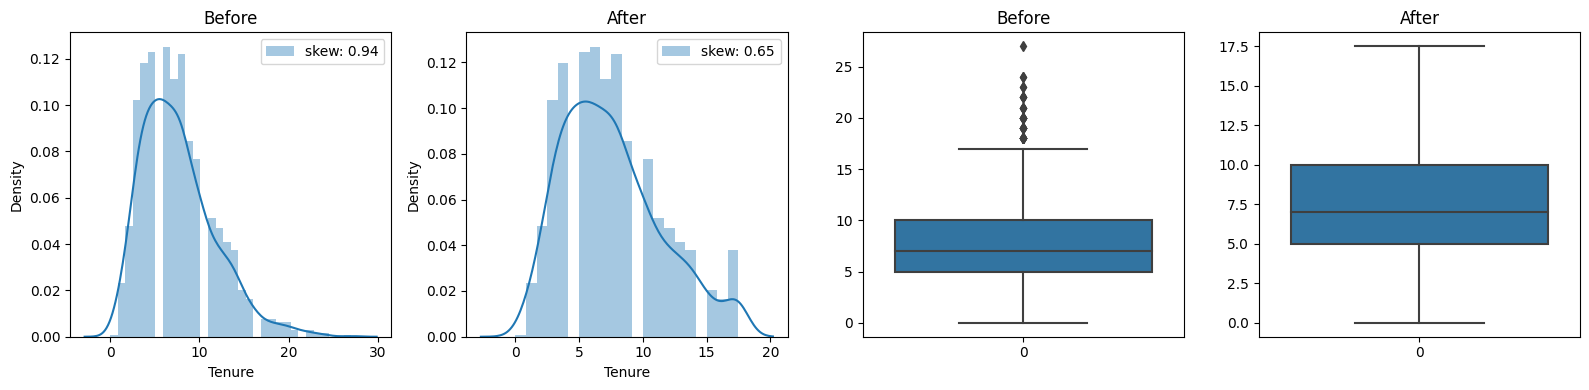

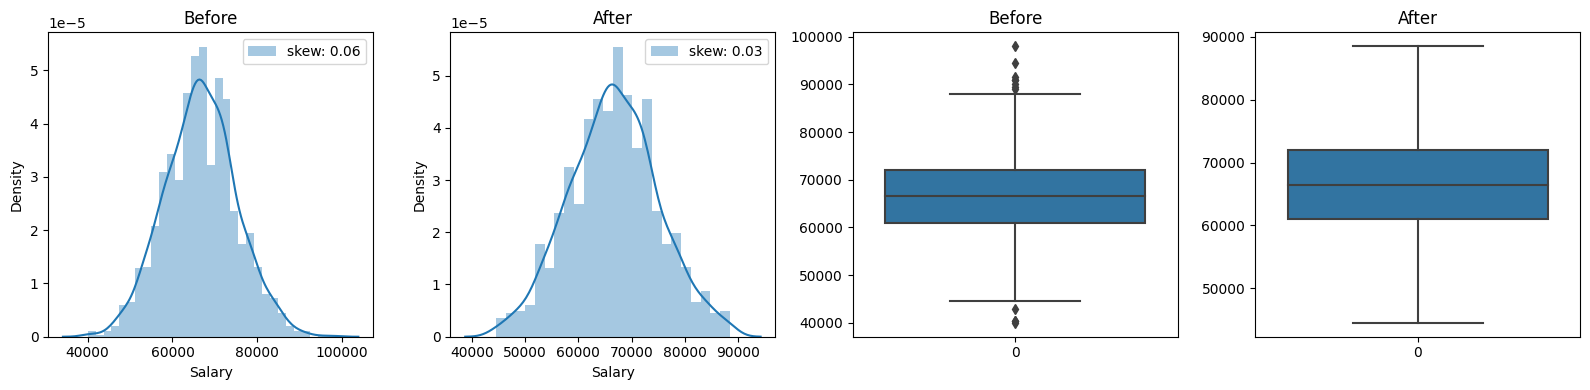

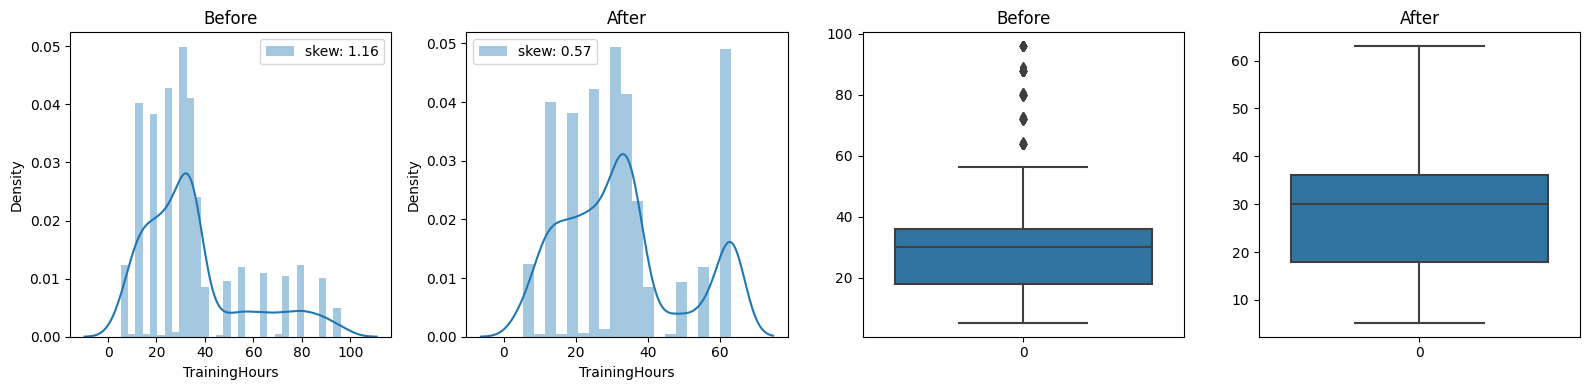

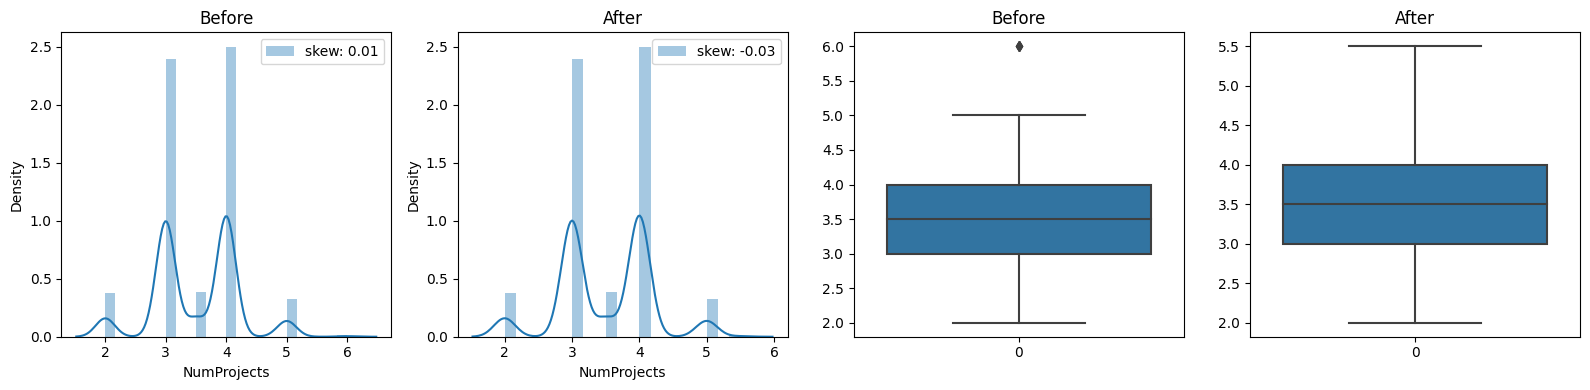

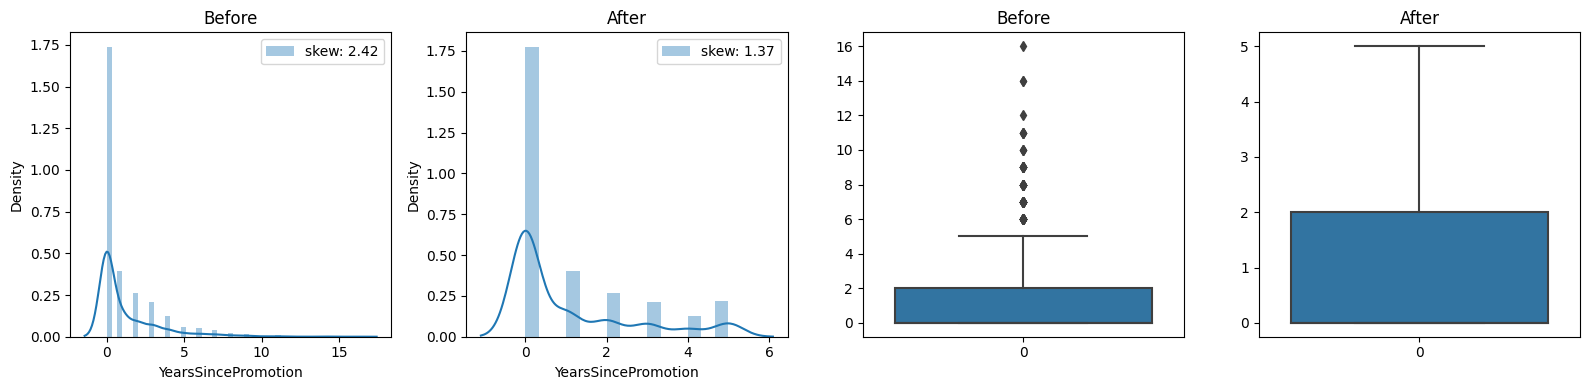

In [65]:
# Visualisasi before dan after capping

for col in cols_numeric:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(data_copy[col], label="skew: " + str(np.round(data_copy[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(data_copy_clean[col], label="skew: " + str(np.round(data_copy_clean[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(data_copy[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(data_copy_clean[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

Hasil Capping dapat terlihat pada boxplot dan sudah tidak ada data outlier.

# Copy Data Clean to CSV

In [66]:
# menyimpan data hasil pre processing dalam csv dengan nama file 'EmployeeChrun_Clean_final'

data_copy_clean.to_csv('EmployeeChrun_Clean_final.csv', sep=',')

# Korelasi

<Axes: >

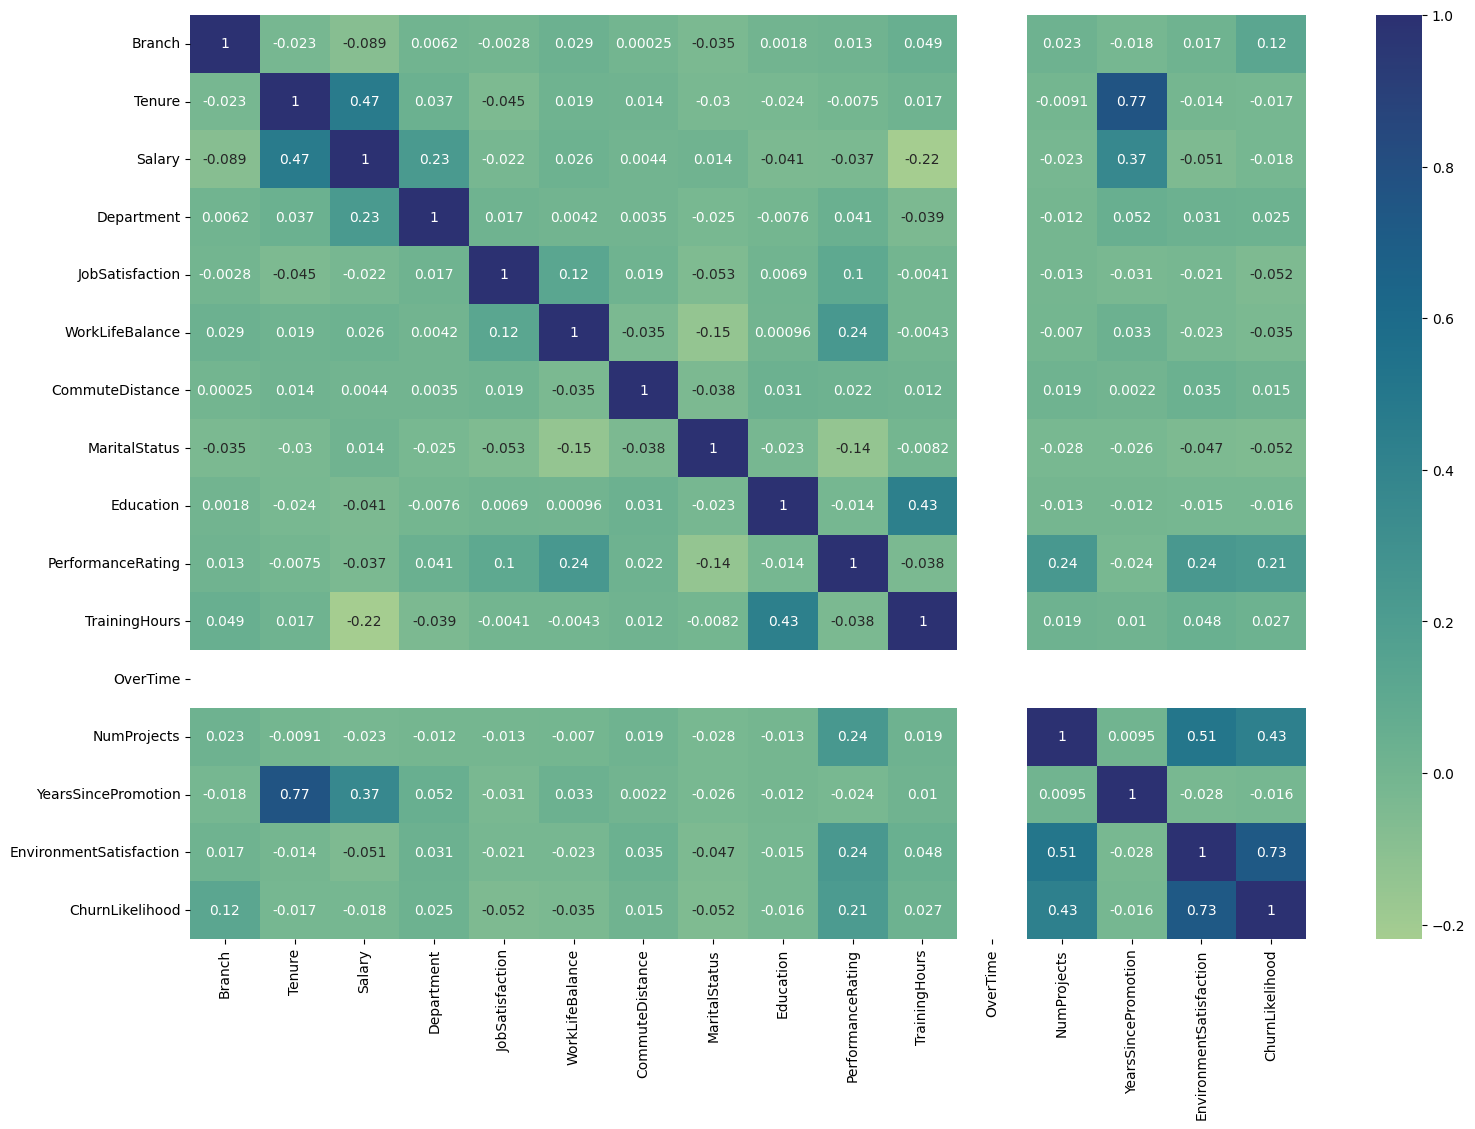

In [67]:
#menampilkan korelasi antar feature dengan heatmap

plt.figure(figsize=(18,12))
sns.heatmap(data_copy_clean.corr() , annot =True,cmap='crest')

A commonly held rule for interpreting the Pearson correlation is that:

* Very strong correlation → 0.8 to 1
* Strong correlation → 0.6 to 0.799
* Moderate correlation → 0.4 to 0.599
* Weak correlation → 0.2 to 0.399
* Very weak correlation → 0 to 0.199

Feature yang memilki korelasi walaupun korelasinya lemah terhadap Churnlikelihood/Target yaitu Feature 'Branch' dengan korelasi terhadap Target 0,12, 'PerformanceRating' dengan korelasi terhadap Target 0,21, 'NumProjects' dengan korelasi terhadap Target 0,43, 'EnvironmentSatisfaction' dengan korelasi terhadap Target 0,73.

# Split Dataset

Dalam memperiapkan Modeling :

- Dataset akan di split/dipisah menjadi dua yaitu Variabel X sebagai feature dan Variabel y sebagai Target.

- Variabel X dan Variabel y masing-masing akan dibagi menjadi dua yaitu untuk data train dan data test

In [68]:
# Variabel Feature dan Target untuk Skenario 1

X = data_copy_clean.drop('ChurnLikelihood', axis=1)
y = data_copy_clean['ChurnLikelihood']

In [69]:
# Split data train dan test dengan test size 80:20 untuk Skenario 1

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 0)

In [70]:
# Normalize Features untuk Skenario 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [71]:
X_train

array([[ 0.97902652,  2.19456039,  2.06413535, ...,  0.71807414,
         1.85011991,  0.68006805],
       [-0.76975812, -0.13617956, -0.79402046, ..., -0.00350851,
        -0.66771628,  0.68006805],
       [ 0.68756241,  0.38176265,  0.03960832, ...,  0.71807414,
        -0.66771628, -0.76186318],
       ...,
       [-1.06122223, -0.39515066, -0.31766115, ..., -0.72509115,
        -0.66771628, -0.76186318],
       [ 0.3960983 ,  0.12279155, -0.91311028, ..., -0.72509115,
        -0.66771628, -0.76186318],
       [-0.18682991, -0.39515066, -0.01993659, ...,  0.71807414,
        -0.66771628,  0.68006805]])

In [72]:
X_test

array([[ 1.18821049,  0.3352422 , -0.1891879 , ...,  0.75459335,
        -0.66577676,  2.08828907],
       [-1.47234778,  0.57904732, -0.3708096 , ...,  0.75459335,
         0.60022335,  0.66696457],
       [-1.1767302 ,  1.06665755,  1.38486684, ..., -0.71188052,
         2.49922352, -0.75435993],
       ...,
       [-1.47234778, -1.37139363,  0.3556772 , ..., -0.71188052,
        -0.66577676, -2.17568443],
       [ 0.30135773,  0.57904732,  0.77946117, ...,  0.75459335,
         0.60022335,  0.66696457],
       [ 1.18821049, -0.63997828, -0.43135017, ..., -2.1783544 ,
        -0.66577676, -0.75435993]])

# Model dan Pelatihan Model

Pada Project ini saya membandingkan empat model yaitu Logistic Regression, Random Forest Classifier, GaussianNB, dan Decision Tree Clasiffier dengan dua Skenario yaitu untuk Skenario 1 menggunakan keseluruhan Features dan untuk Skenario 2 menggunakan Features yang memiliki Korelasi terhadap Target ('Churnlikelihood').

# Skenario 1

Pada Skenario 1 akan menggunakan Fetaure 'Branch', 'Tenure', 'Salary', 'Department', 'JobSatisfaction', 'WorkLifeBalance', 'CommuteDistance', 'MaritalStatus', 'Education', 'PerformanceRating', 'TrainingHours', 'OverTime', 'NumProjects', 'YearsSincePromotion' 'EnvironmentSatisfaction' untuk memprediksi Target ('ChurnLikelihood') dan membandingkan dengan empat model.

## LogisticRegression

In [73]:
#fitting training data ke model LogisticRegression untuk Skenario 1

logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

### Predict Model LogisticRegression

In [74]:
# Predict model Logistic Regression pada training data untuk Skenario 1
logr_train_pred = logr.predict(X_train)

# Predict model Logistic Regression pada testing data m untuk Skenario 1
logr_test_pred = logr.predict(X_test)

### Accuracy Model LogisticRegression

In [75]:
# accuracy model Logistic Regression untuk Skenario 1

# accuracy training model
logr_train_accuracy = accuracy_score(y_train, logr_train_pred)

# accuracy testing model
logr_test_accuracy = accuracy_score(y_test, logr_test_pred)

print('Logistic Regression')
print("Accuracy Training Model = %s" % (logr_train_accuracy))
print("Accuracy Testing Model = %s" % (logr_test_accuracy))

Logistic Regression
Accuracy Training Model = 0.899513776337115
Accuracy Testing Model = 0.919093851132686


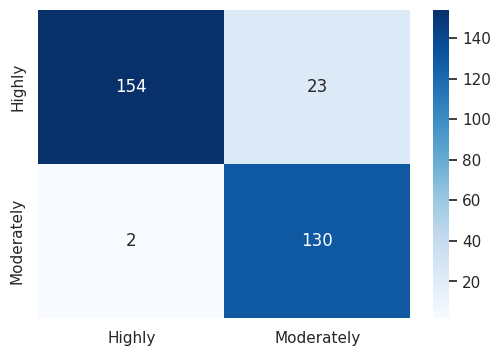

In [143]:
# confusion_matrix pada model Logistic Regression untuk Skenario 1

logr_cf_matrix = confusion_matrix(y_test, logr_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(logr_cf_matrix, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Highly", "Moderately"])
ax.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [77]:
confusion_matrix(y_test, logr_test_pred)

array([[154,  23],
       [  2, 130]])

In [78]:
#melihat classification report model Logistic Regression untuk Skenario 1

print("Classification Report:")
print(classification_report(y_test, logr_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       177
           1       0.85      0.98      0.91       132

    accuracy                           0.92       309
   macro avg       0.92      0.93      0.92       309
weighted avg       0.93      0.92      0.92       309



## RandomForestClassifier

In [79]:
# Split data train dan test dengan test size 80:20 untuk model Random Forest Skenario 1

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 0)

In [80]:
# Normalize Features model Random Forest untuk Skenario 1

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

In [81]:
# fitting training data ke model Random Forest untuk Skenario 1

rf_model=RandomForestClassifier()
rf_model.fit(X1_train, y1_train)


RandomForestClassifier()

### Predict Model RandomForestClassifier

In [82]:
# Predict model Random Forest on training data untuk Skenario 1
rf_train_pred = rf_model.predict(X1_train)

# Predict model Random Forest on testing data untuk Skenario 1
rf_test_pred = rf_model.predict(X1_test)


### Accuracy Model RandomForestClassifier

In [83]:
# accuracy model Random Forest untuk Skenario 1

# accuracy training model
rf_train_accuracy = accuracy_score(y1_train, rf_train_pred)

# accuracy testing model
rf_test_accuracy = accuracy_score(y1_test, rf_test_pred)

print('Random Forest Classifier')
print("Accuracy Training Model = %s" % (rf_train_accuracy))
print("Accuracy Testing Model = %s" % (rf_test_accuracy))

Random Forest Classifier
Accuracy Training Model = 1.0
Accuracy Testing Model = 0.9255663430420712


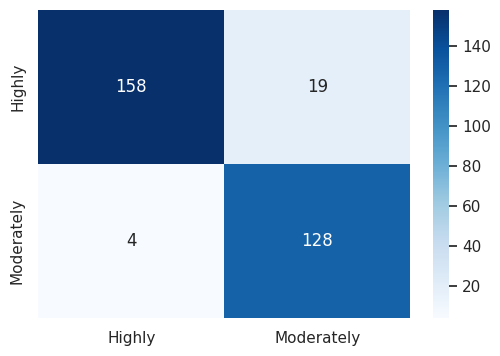

In [84]:
# confusion_matrix pada model Random Forest untuk Skenario 1

cf_matrix_rf = confusion_matrix(y1_test, rf_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax1 = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax1.set_xticklabels(["Highly", "Moderately"])
ax1.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [85]:
#melihat classification report model Random Forest untuk Skenario 1

print("Classification Report:")
print(classification_report(y1_test, rf_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       177
           1       0.87      0.97      0.92       132

    accuracy                           0.93       309
   macro avg       0.92      0.93      0.92       309
weighted avg       0.93      0.93      0.93       309



## GaussianNB

In [86]:
# Split data train dan test dengan test size 80:20 untuk model GaussianNB Skenario 1

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 0)

In [87]:
# Normalize Features model Random Forest untuk Skenario 1

scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [88]:
# fitting training data ke model GaussianNB untuk Skenario 1

Gauss_model=GaussianNB()
Gauss_model.fit(X2_train, y2_train)

GaussianNB()

### Predict Model GaussianNB

In [89]:
# Predict model GaussianNB on training data untuk Skenario 1
gus_train_pred = Gauss_model.predict(X2_train)

# Predict model GaussianNB on testing data untuk Skenario 1
gaus_test_pred = Gauss_model.predict(X2_test)


### Accuracy Model GaussianNB

In [90]:
# accuracy model GaussianNB untuk Skenario 1

# accuracy training model
gaus_train_accuracy = accuracy_score(y2_train, gus_train_pred)

# accuracy testing model
gaus_test_accuracy = accuracy_score(y2_test, gaus_test_pred)

print('GaussianNB')
print("Accuracy Training Model = %s" % (gaus_train_accuracy))
print("Accuracy Testing Model = %s" % (gaus_test_accuracy))

GaussianNB
Accuracy Training Model = 0.893030794165316
Accuracy Testing Model = 0.9223300970873787


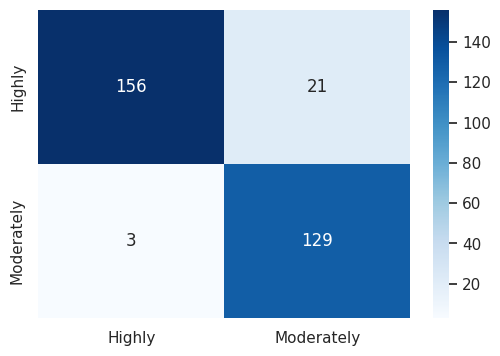

In [91]:
# confusion_matrix pada model GaussianNB untuk Skenario 1

Gauss_matrix = confusion_matrix(y2_test, gaus_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax2 = sns.heatmap(Gauss_matrix, annot = True,cmap='Blues', fmt='g')
ax2.set_xticklabels(["Highly", "Moderately"])
ax2.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [92]:
#melihat classification report model GaussianNB untuk Skenario 1

print("Classification Report:")
print(classification_report(y2_test, gaus_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       177
           1       0.86      0.98      0.91       132

    accuracy                           0.92       309
   macro avg       0.92      0.93      0.92       309
weighted avg       0.93      0.92      0.92       309



## Decision Tree Classifier

In [93]:
# Split data train dan test dengan test size 80:20 untuk model Decision Tree Skenario 1

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 0)

In [94]:
# Normalize Features model Decision Tree untuk Skenario 1

scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.fit_transform(X3_test)

In [95]:
# fitting training data ke model Decision Tree untuk Skenario 1

dt_model=DecisionTreeClassifier()
dt_model.fit(X3_train, y3_train)

DecisionTreeClassifier()

### Predict Model Decision Tree Classifier

In [96]:
# Predict model Decision Tree on training data untuk Skenario 1
dt_train_pred = dt_model.predict(X3_train)

# Predict model Decision Tree on testing data untuk Skenario 1
dt_test_pred = dt_model.predict(X3_test)


### Accuracy Model Decision Tree Classifier

In [97]:
# accuracy model Decision Tree untuk Skenario 1

# accuracy training model
dt_train_accuracy = accuracy_score(y3_train, dt_train_pred)

# accuracy testing model
dt_test_accuracy = accuracy_score(y3_test, dt_test_pred)

print('Decision Tree Classifier')
print("Accuracy Training Model = %s" % (dt_train_accuracy))
print("Accuracy Testing Model = %s" % (dt_test_accuracy))

Decision Tree Classifier
Accuracy Training Model = 1.0
Accuracy Testing Model = 0.941747572815534


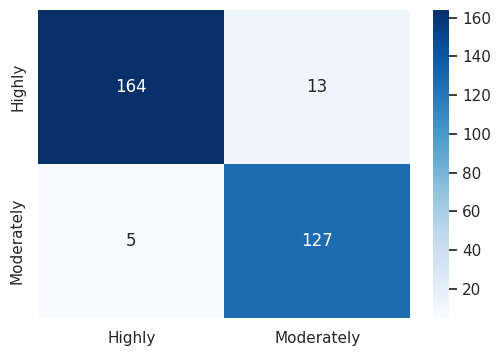

In [98]:
# confusion_matrix pada model Decision Tree untuk Skenario 1

dt_matrix = confusion_matrix(y3_test, dt_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax3 = sns.heatmap(dt_matrix, annot = True,cmap='Blues', fmt='g')
ax3.set_xticklabels(["Highly", "Moderately"])
ax3.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [99]:
#melihat classification report model Decision Tree untuk Skenario 1

print("Classification Report:")
print(classification_report(y3_test, dt_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       177
           1       0.91      0.96      0.93       132

    accuracy                           0.94       309
   macro avg       0.94      0.94      0.94       309
weighted avg       0.94      0.94      0.94       309



# Skenario 2

Pada Skenario 2 akan menggunakan Fetaure 'Branch', 'PerformanceRating', 'NumProjects', 'EnvironmentSatisfaction' untuk memprediksi Target ('ChurnLikelihood') dan membandingkan dengan empat model.

In [100]:
#memisahkan feature dan target untuk Skenario 2

# Nama-nama feature columns untuk Skenario 2
feature_columns2 = ['Branch', 'NumProjects', 'EnvironmentSatisfaction', 'PerformanceRating']

# Features variable
X4 = data_copy_clean[feature_columns2]

# Target variable
y4 = data_copy_clean['ChurnLikelihood']
y4=y4.astype('int')

In [101]:
X4.head()

,Branch,NumProjects,EnvironmentSatisfaction,PerformanceRating
0,9,3.0,2.0,3.0
1,2,3.0,3.0,4.0
2,6,3.5,4.0,4.0
3,10,4.0,3.0,4.0
4,10,4.0,3.0,3.0


In [102]:
y4.head()

0    0
1    1
2    0
3    1
4    1
Name: ChurnLikelihood, dtype: int64

In [103]:
# Split data train dan test dengan test size 80:20 untuk model Logistic Regression Skenario 2

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=0)

In [104]:
# Normalize Features model Logistic Regression untuk Skenario 2

scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.fit_transform(X4_test)

## LogisticRegression

In [105]:
# fitting training data ke model Logistic Regression untuk Skenario 2

logr2 = LogisticRegression()
logr2.fit(X4_train, y4_train)

LogisticRegression()

### Predict Model LogisticRegression

In [106]:
# Predict model Logistic Regression on training data untuk Skenario 2
logr2_train_pred = logr2.predict(X4_train)

# Predict model Logistic Regression on testing data untuk Skenario 2
logr2_test_pred = logr2.predict(X4_test)

### Accuracy Model LogisticRegression

In [107]:
# accuracy model Logistic Regression untuk Skenario 1

# accuracy training model
logr2_train_accuracy = accuracy_score(y4_train, logr2_train_pred)

# accuracy testing model
logr2_test_accuracy = accuracy_score(y4_test, logr2_test_pred)

print('Logistic Regression 2')
print("Accuracy Training Model = %s" % (logr2_train_accuracy))
print("Accuracy Testing Model = %s" % (logr2_test_accuracy))

Logistic Regression 2
Accuracy Training Model = 0.9035656401944895
Accuracy Testing Model = 0.9158576051779935


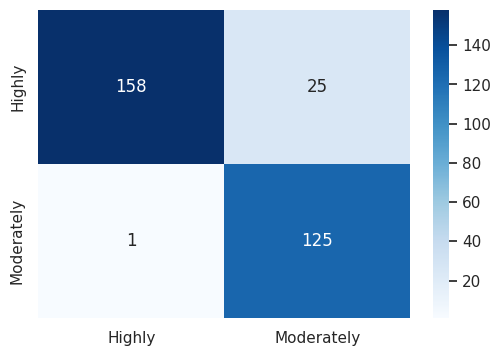

In [108]:
# confusion_matrix pada model Logistic Regression untuk Skenario 2

logr2_cf_matrix = confusion_matrix(y4_test, logr2_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax4 = sns.heatmap(logr2_cf_matrix, annot = True,cmap='Blues', fmt='g')
ax4.set_xticklabels(["Highly", "Moderately"])
ax4.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [109]:
#melihat classification report model Logistic Regression untuk Skenario 2

print("Classification Report:")
print(classification_report(y4_test, logr2_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       183
           1       0.83      0.99      0.91       126

    accuracy                           0.92       309
   macro avg       0.91      0.93      0.91       309
weighted avg       0.93      0.92      0.92       309



## RandomForestClassifier

In [110]:
# Split data train dan test dengan test size 80:20 untuk model Random Forest Skenario 2

X5_train, X5_test, y5_train, y5_test = train_test_split(X4, y4, test_size=0.20, random_state=0)

In [111]:
X5_train.head()

,Branch,NumProjects,EnvironmentSatisfaction,PerformanceRating
1453,1,4.0,2.0,4.0
443,9,3.0,3.0,5.0
609,1,3.0,2.0,3.0
808,1,3.5,1.0,3.0
326,7,3.0,3.0,4.0


In [112]:
y5_train.head()

1453    0
443     1
609     0
808     0
326     1
Name: ChurnLikelihood, dtype: int64

In [113]:
# Normalize Features model Random Forest untuk Skenario 2

scaler = StandardScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.fit_transform(X5_test)

In [114]:
# fitting training data ke model Random Forest untuk Skenario 2

rf2_model=RandomForestClassifier()
rf2_model.fit(X5_train, y5_train)


RandomForestClassifier()

### Predict Model RandomForestClassifier

In [115]:
# Predict model Random Forest on training data untuk Skenario 2
rf2_train_pred = rf2_model.predict(X5_train)

# Predict model Random Forest on testing data untuk Skenario 2
rf2_test_pred = rf2_model.predict(X5_test)


### Accuracy Model Decision Tree Classifier

In [116]:
# accuracy model Random Forest untuk Skenario 2

# accuracy training model
rf2_train_accuracy = accuracy_score(y5_train, rf2_train_pred)

# accuracy testing model
rf2_test_accuracy = accuracy_score(y5_test, rf2_test_pred)

print('Random Forest Classifier')
print("Accuracy Training Model = %s" % (rf2_train_accuracy))
print("Accuracy Testing Model = %s" % (rf2_test_accuracy))

Random Forest Classifier
Accuracy Training Model = 0.9837925445705025
Accuracy Testing Model = 0.9805825242718447


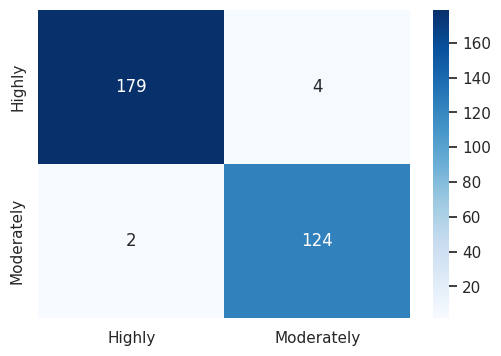

In [117]:
# confusion_matrix pada model Random Forest untuk Skenario 2

rf2_matrix = confusion_matrix(y5_test, rf2_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax5 = sns.heatmap(rf2_matrix, annot = True,cmap='Blues', fmt='g')
ax5.set_xticklabels(["Highly", "Moderately"])
ax5.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [118]:
#melihat classification report model Random Forest untuk Skenario 2

print("Classification Report:")
print(classification_report(y5_test, rf2_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       183
           1       0.97      0.98      0.98       126

    accuracy                           0.98       309
   macro avg       0.98      0.98      0.98       309
weighted avg       0.98      0.98      0.98       309



## GaussianNB

In [119]:
# Split data train dan test dengan test size 80:20 untuk model GaussianNB Skenario 2

X6_train, X6_test, y6_train, y6_test = train_test_split(X4, y4, stratify = y4, test_size = 0.20, random_state = 0)

In [120]:
X6_train.head()

,Branch,NumProjects,EnvironmentSatisfaction,PerformanceRating
1456,9,4.0,3.0,3.0
1413,3,3.5,3.0,3.0
270,8,4.0,2.0,4.0
1374,1,3.0,2.0,4.0
366,4,4.0,3.0,3.0


In [121]:
X6_test.head()

,Branch,NumProjects,EnvironmentSatisfaction,PerformanceRating
486,10,4.0,4.0,4.0
611,1,4.0,3.0,3.0
947,2,3.0,2.0,3.0
1460,8,3.0,2.0,3.0
333,8,4.0,3.0,4.0


In [122]:
# Normalize Features model GaussianNB untuk Skenario 2

scaler = StandardScaler()
X6_train = scaler.fit_transform(X6_train)
X6_test = scaler.fit_transform(X6_test)

In [123]:
# fitting training data ke model GaussianNB untuk Skenario 2

Gauss2_model=GaussianNB()
Gauss2_model.fit(X6_train, y6_train)

GaussianNB()

### Predict Model GaussianNB

In [124]:
# Predict model GaussianNB on training data untuk Skenario 2
gus2_train_pred = Gauss2_model.predict(X6_train)

# Predict model GaussianNB on testing data untuk Skenario 2
gaus2_test_pred = Gauss2_model.predict(X6_test)


### Accuracy Model GaussianNB

In [125]:
# accuracy model GaussianNB untuk Skenario 2

# accuracy training model
gaus2_train_accuracy = accuracy_score(y6_train, gus2_train_pred)

# accuracy testing model
gaus2_test_accuracy = accuracy_score(y6_test, gaus2_test_pred)

print('GaussianNB')
print("Accuracy Training Model = %s" % (gaus2_train_accuracy))
print("Accuracy Testing Model = %s" % (gaus2_test_accuracy))

GaussianNB
Accuracy Training Model = 0.8905996758508914
Accuracy Testing Model = 0.9061488673139159


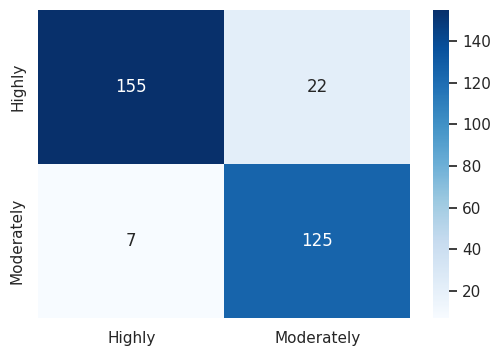

In [126]:
# confusion_matrix pada model GaussianNB untuk Skenario 2

Gauss2_matrix = confusion_matrix(y6_test, gaus2_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax6 = sns.heatmap(Gauss2_matrix, annot = True,cmap='Blues', fmt='g')
ax6.set_xticklabels(["Highly", "Moderately"])
ax6.set_yticklabels(["Highly", "Moderately"])
plt.show()

In [127]:
#melihat classification report model GaussianNB untuk Skenario 2

print("Classification Report:")
print(classification_report(y6_test, gaus2_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       177
           1       0.85      0.95      0.90       132

    accuracy                           0.91       309
   macro avg       0.90      0.91      0.91       309
weighted avg       0.91      0.91      0.91       309



## Decision Tree Classifier

In [128]:
# Split data train dan test dengan test size 80:20 untuk model Decision Tree Skenario 2

X7_train, X7_test, y7_train, y7_test = train_test_split(X4, y4, stratify = y4, test_size = 0.20, random_state = 0)

In [129]:
X7_train.head()

,Branch,NumProjects,EnvironmentSatisfaction,PerformanceRating
1456,9,4.0,3.0,3.0
1413,3,3.5,3.0,3.0
270,8,4.0,2.0,4.0
1374,1,3.0,2.0,4.0
366,4,4.0,3.0,3.0


In [130]:
X7_test.head()

,Branch,NumProjects,EnvironmentSatisfaction,PerformanceRating
486,10,4.0,4.0,4.0
611,1,4.0,3.0,3.0
947,2,3.0,2.0,3.0
1460,8,3.0,2.0,3.0
333,8,4.0,3.0,4.0


In [131]:
# Normalize Features model Decision Tree untuk Skenario 2

scaler = StandardScaler()
X7_train = scaler.fit_transform(X7_train)
X7_test = scaler.fit_transform(X7_test)

In [132]:
# fitting training data ke model Decision Tree untuk Skenario 2

dt2_model=DecisionTreeClassifier()
dt2_model.fit(X7_train, y7_train)

DecisionTreeClassifier()

### Predict Model Decision Tree Classifier

In [133]:
# Predict model Decision Tree on training data untuk Skenario 2
dt2_train_pred = dt2_model.predict(X7_train)

# Predict model Decision Tree on testing data untuk Skenario 2
dt2_test_pred = dt2_model.predict(X7_test)


### Accuracy Model Decision Tree Classifier

In [134]:
# accuracy model Decision Tree untuk Skenario 2

# accuracy training model
dt2_train_accuracy = accuracy_score(y7_train, dt2_train_pred)

# accuracy testing model
dt2_test_accuracy = accuracy_score(y7_test, dt2_test_pred)

print('Decision Tree Classifier')
print("Accuracy Training Model = %s" % (dt2_train_accuracy))
print("Accuracy Testing Model = %s" % (dt2_test_accuracy))

Decision Tree Classifier
Accuracy Training Model = 0.9846029173419774
Accuracy Testing Model = 0.9773462783171522


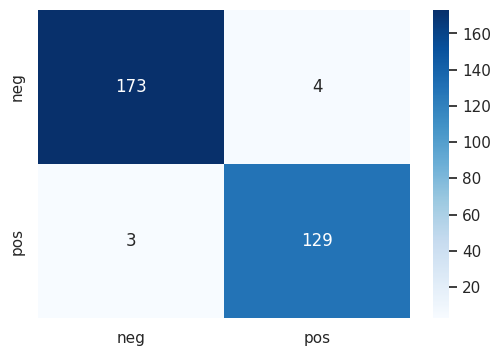

In [135]:
# confusion_matrix pada model Decision Tree untuk Skenario 2

dt2_matrix = confusion_matrix(y7_test, dt2_test_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax7 = sns.heatmap(dt2_matrix, annot = True,cmap='Blues', fmt='g')
ax7.set_xticklabels(["neg", "pos"])
ax7.set_yticklabels(["neg", "pos"])
plt.show()

In [136]:
#melihat classification report model Decision Tree untuk Skenario 2

print("Classification Report:")
print(classification_report(y7_test, dt2_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       177
           1       0.97      0.98      0.97       132

    accuracy                           0.98       309
   macro avg       0.98      0.98      0.98       309
weighted avg       0.98      0.98      0.98       309



# Perbandingan Model

In [137]:
print('Skenario 1')

a = [1,'Logistic Regression', 0.92,	0.85, 0.98, 0.91 ]
b = [1,'RandomForestClassifier',	0.94,	0.87, 0.99, 0.93]
c = [1,'GaussianNB',	0.92,	0.86,	0.98,	0.91]
d = [1,'Decision Tree Classifier', 0.93, 0.89, 0.95, 0.92]
Skenario_1 = pd.DataFrame([a, b, c, d])
Skenario_1.columns = ['Skenario','Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
Skenario_1

Skenario 1


,Skenario,Model_name,Accuracy,Precision,Recall,F1 Score
0,1,Logistic Regression,0.92,0.85,0.98,0.91
1,1,RandomForestClassifier,0.94,0.87,0.99,0.93
2,1,GaussianNB,0.92,0.86,0.98,0.91
3,1,Decision Tree Classifier,0.93,0.89,0.95,0.92


In [138]:
print('Skenario 2')

e = [2,'Logistic Regression', 0.92,	0.83, 0.99, 0.92]
f = [2,'RandomForestClassifier',	0.98,	0.96,	0.98,	0.97]
g = [2,'GaussianNB',	0.91,	0.85, 0.95,	0.90]
h = [2,'Decision Tree Classifier', 0.98, 0.97, 0.98, 0.97]
Skenario_2 = pd.DataFrame([e, f, g, h])
Skenario_2.columns = ['Skenario', 'Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
Skenario_2

Skenario 2


,Skenario,Model_name,Accuracy,Precision,Recall,F1 Score
0,2,Logistic Regression,0.92,0.83,0.99,0.92
1,2,RandomForestClassifier,0.98,0.96,0.98,0.97
2,2,GaussianNB,0.91,0.85,0.95,0.90
3,2,Decision Tree Classifier,0.98,0.97,0.98,0.97


In [139]:
row = pd.concat([Skenario_1,Skenario_2])
row

,Skenario,Model_name,Accuracy,Precision,Recall,F1 Score
0,1,Logistic Regression,0.92,0.85,0.98,0.91
1,1,RandomForestClassifier,0.94,0.87,0.99,0.93
2,1,GaussianNB,0.92,0.86,0.98,0.91
3,1,Decision Tree Classifier,0.93,0.89,0.95,0.92
0,2,Logistic Regression,0.92,0.83,0.99,0.92
1,2,RandomForestClassifier,0.98,0.96,0.98,0.97
2,2,GaussianNB,0.91,0.85,0.95,0.90
3,2,Decision Tree Classifier,0.98,0.97,0.98,0.97


Berdasarkan Perbandingan ke empat model di atas untuk memprediksi Target/'Churnlikelihood', Nilai Accuracy tertinggi yaitu model Decisison Tree Classifier dan Random Forest Classifier dengan accuracy 98% dengan Skenario 2 menggunakan fetaure Branch', 'PerformanceRating', 'NumProjects', 'EnvironmentSatisfaction'. Jika dibandingkan dengan Nilai Precision model Decisison Tree Classifier lebih tinggi yaitu 97% dan Jika dibandingkan dengan Nilai Recall Decision Tree Classifier lebih tinggi yaitu 97% maka Model Terbaik yaitu Decision Tree Classifier.

In [140]:
row.to_csv('Perbandingan_model.csv', sep=',')